# **<p align="center">Predicting The Success of Video Games</p>**
### <p align="center">Kevin Rathbun</p>

### **1. Introduction**
Video game developers and companies develop their games with one major goal in mind: to produce a successful game.<br>
But what makes a game successful and how would we measure its success? In this data exploration project I will<br>
explore these questions to provide insight and analysis into what makes a game successful. Further, I will create a<br>
method to predict the success of a game based on various metrics. This will be useful for video game developers<br>
in determining what they could be doing to improve their chance of creating a successful game.<br>
<br><br>
TODO UPDATE IF GOALS CHANGE <br>
The metrics I will be looking at are the release date, developer, publisher, supported platforms,<br>
categories and genres the game falls into, price, and hardware requirements to play the game.<br>
This is by no means a comprehensive list of what determines the success of a game, but will serve as useful metrics<br>
in predicting success. To measure success, I will look at average playtimes of users, the ratings of the<br>
game, and the revenue generated from sales.<br>
<br><br>
A dataset produced by Nik Davis on Kaggle (available at https://www.kaggle.com/datasets/nikdavis/steam-store-games)<br>
will serve very nicely for my analysis. This dataset contains the metrics I need on over 27,000 Steam games.<br>
<br><br>
What is Steam? Steam is a digital PC game distribution platform created by Valve Corporation in 2003.<br>
It is the largest and most popular platform for PC gaming worldwide with over 30,000 games. With Steam,<br>
users are able to browse the store for games, watch game trailers, interact and play with friends, receive<br>
tailored game recommendations, and much more. Because of its popularity and huge number of diverse games,<br>
it will be a great platform to use in my exploration.<br>
(sources: https://pcgamesforsteam.com/what-is-steam,<br>
https://www.uktech.news/other_news/best-pc-video-game-digital-distribution-services).<br>

#### The Dataset:<br>
**18 Columns:**<br>
**0: appid:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;The unique appid associated with the game<br>
**1: name:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;The name of the game<br>
**2: release_date:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;When the game was first released on Steam in YYYY-MM-DD format<br>
**3: english:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;1 if the game is in English, 0 otherwise<br>
**4: developer:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;Name(s) of developer(s) separated by semicolon if multiple<br>
**5: publisher:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;Name(s) of publisher(s) separated by semicolon if multiple<br>
**6: platforms:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;The supported platform(s) separated by semicolons if multiple.<br>
&nbsp;&nbsp;&nbsp;&nbsp;Possible platforms are windows;mac;linux.<br>
**7: required_age:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;Minimum age required according to PEGI UK standards.<br>
&nbsp;&nbsp;&nbsp;&nbsp;Entries of 0 are unrated or unsupplied<br>
**8: categories:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;Categories associated with the game separated by semicolons e.g., Single-player;Multi-player<br>
**9: genres:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;The generes associated with the game separated by semicolons e.g., Action;Indie<br>
**10: steamspy_tags:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;The steamspy_tags associated with the game separated by semicolons.<br>
&nbsp;&nbsp;&nbsp;&nbsp;Similar to genres, but are community voted e.g., Action;Indie<br>
**11: achievements:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;Number of achievements in the game<br>
**12: positive_ratings:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;Number of positive ratings on Steam<br>
**13: negative_ratings:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;Number of negative ratings on Steam<br>
**14: average_playtime:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;Average playtime of users in minutes<br>
**15: median_playtime:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;Median playtime of users in minutes<br>
**16: owners:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;Estimated number of owners (lower and upper bound) e.g., 20000-50000<br>
**17: price:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;Price of game in GBP<br>

#### Important Notes:<br>
It is important to note that this data was gathered around May of 2019, so it is not entirely representative of<br>
the games on Steam today or the metrics associated with them.<br>
It should also be noted that Steam is for PC games *only* so this data is not representative of console games<br>
or their playerbase.<br>

### **2. Gathering and Transforming the Data**
To begin, let's gather the data we need and transform it to suit our goals.<br>
Here we gather the two datasets we need: the dataset described in the introduction<br>
as well as the hardware requirements dataset (also available at https://www.kaggle.com/datasets/nikdavis/steam-store-games).<br>

In [106]:
# Imports
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
from statistics import mean, median
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr

In [107]:
# Increase the max number of columns and rows which can be displayed
pd.set_option("max_columns", 500)
pd.set_option("max_rows", 500)
# Load the steam_games csv into a pandas dataframe
games_df = pd.read_csv('steam_games.csv')
# Load the steam_requirements_data into a pandas dataframe
requirements_df = pd.read_csv('steam_requirements_data.csv')
print("Steam games data:")
display(games_df.head(10))
print("Steam game requirements data:")
display(requirements_df.head(10))
print("Value counts of required_age")
print(games_df["required_age"].value_counts())

Steam games data:


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
5,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,Action;FPS;Multiplayer,0,2758,684,175,10,5000000-10000000,3.99
6,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,0,27755,1100,1300,83,5000000-10000000,7.19
7,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Multiplayer,0,12120,1439,427,43,10000000-20000000,7.19
8,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,FPS;Action;Sci-fi,0,3822,420,361,205,5000000-10000000,3.99
9,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,FPS;Action;Sci-fi,33,67902,2419,691,402,10000000-20000000,7.19


Steam game requirements data:


,steam_appid,pc_requirements,mac_requirements,linux_requirements,minimum,recommended
0,10,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
1,20,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
2,30,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
3,40,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
4,50,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
5,60,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
6,70,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
7,80,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,[],[],"500 mhz processor, 96mb ram, 16mb video card, ...",NaN
8,130,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
9,220,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,[],"OS: Windows 7, Vista, XP Processor: 1.7 Ghz Me...",NaN


Value counts of required_age
0     26479
18      308
16      192
12       73
7        12
3        11
Name: required_age, dtype: int64


Now, lets transform the dataframe to be better suited for our data analysis by removing unnecessary columns and transforming columns to be better suited for analysis.<br>
<br>
The columns we will be removing are:<br>

**english**: Even if games in English are associated with more or less success, it doesn't really tell us anything<br>
about the game itself.<br>
**achievements**: The number of achievements in a game is most likely not a good indicator of success.<br>
**required_age**: As shown above, the dataset contains mostly 0s for this metric so it will not be very useful.<br>
**positive_ratings and negative_ratings**: Instead, we will have one ratings column for the percent of people who rated positively.<br>
This makes it easier to compare across different games<br>
**steamspy_tags**: Instead, we will just focus on genres. The genres are less nuanced than the tags<br>
making for easier comparisons. There are 300+ tags making it hard to do comparisons between them all.<br>
<br>

The columns we will be transforming are:<br>

**release_date** : Only the year is important<br>
**platforms, categories, genres**: One-hot encode for easier analysis<br>
**owners**: Is currently a range--just take the middle of this range<br>
**minimum**: Currently has all the minimum hardware requirements... Instead we will just look at the minimum ram<br>
requirement (in GB) so we have a metric which can easily be compared across games.

We will also add a new column **est_revenue** which is a product of the number of owners and the price to estimate the revenue of the game<br>
(in GBP)<br>

In [108]:
def transform_owners(x):
    split = x.split("-")
    low = int(split[0])
    high = int(split[1])
    return int((low + high) * 0.5)
def transform_reqs(reqs):
    if (reqs is not np.nan):
        # Remove spaces and make the string lowercase
        reqs = reqs.replace(" ", "")
        reqs = reqs.lower()
        # Find how much ram and the unit (mb or gb)
        res = re.search('[0-9]+(mbram|gbram)', reqs)
        # If found
        if res:
            # The string found (e.g., 96mbram, 1gbram)
            res_str = res.group()
            # If mb, convert to gb and return
            if 'mb' in res_str:
                # Extract the number
                res = re.search('[0-9]+', res_str)
                number = int(res.group())
                # Convert to gb
                return number / 1000
            elif 'gb' in res_str:
                # Extract the number
                res = re.search('[0-9]+', res_str)
                return int(res.group())
        else:
            return np.nan
    else:
        return np.nan

games_df["release_date"] = games_df["release_date"].apply(lambda x: int(x[0:4]))
games_df["owners"] = games_df["owners"].apply(transform_owners)
games_df["rating"] = games_df["positive_ratings"] / (games_df["positive_ratings"] + games_df["negative_ratings"])
# Join the two dataframes on appid
games_df = games_df.join(requirements_df.set_index("steam_appid"), on=["appid"])
# Drop unneeded columns mentioned above
games_df.drop(columns=['english', 'achievements', 'required_age', 'positive_ratings', 'negative_ratings', 'steamspy_tags'], inplace=True)
# Drop unneeded columns resulting from joining the 2 dataframes
games_df.drop(columns=['pc_requirements', 'mac_requirements', 'linux_requirements', 'recommended'], inplace=True)
games_df["minimum"] = games_df["minimum"].apply(transform_reqs)
# Raname "minimum" to "min_req_ram"
games_df.rename(columns={'minimum': 'min_req_ram'}, inplace=True)
games_df["est_revenue"] = games_df["owners"] * games_df["price"]
display(games_df.head(10))

,appid,name,release_date,developer,publisher,platforms,categories,genres,average_playtime,median_playtime,owners,price,rating,min_req_ram,est_revenue
0,10,Counter-Strike,2000,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,17612,317,15000000,7.19,0.973888,0.096,107850000.0
1,20,Team Fortress Classic,1999,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,277,62,7500000,3.99,0.839787,0.096,29925000.0
2,30,Day of Defeat,2003,Valve,Valve,windows;mac;linux,Multi-player;Valve Anti-Cheat enabled,Action,187,34,7500000,3.99,0.895648,0.096,29925000.0
3,40,Deathmatch Classic,2001,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,258,184,7500000,3.99,0.826623,0.096,29925000.0
4,50,Half-Life: Opposing Force,1999,Gearbox Software,Valve,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,624,415,7500000,3.99,0.947996,0.096,29925000.0
5,60,Ricochet,2000,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,175,10,7500000,3.99,0.801278,0.096,29925000.0
6,70,Half-Life,1998,Valve,Valve,windows;mac;linux,Single-player;Multi-player;Online Multi-Player...,Action,1300,83,7500000,7.19,0.961878,0.096,53925000.0
7,80,Counter-Strike: Condition Zero,2004,Valve,Valve,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,427,43,15000000,7.19,0.893871,0.096,107850000.0
8,130,Half-Life: Blue Shift,2001,Gearbox Software,Valve,windows;mac;linux,Single-player,Action,361,205,7500000,3.99,0.900990,0.096,29925000.0
9,220,Half-Life 2,2004,Valve,Valve,windows;mac;linux,Single-player;Steam Achievements;Steam Trading...,Action,691,402,15000000,7.19,0.965601,0.512,107850000.0


In [109]:
# A helper function used to see the unique elements over an entire column in games_df.
# Each element of the column should be a list e.g., ['Action', 'Indie']
def unique_col_elts(column_name):
    col_as_list = [x for x in games_df[column_name]]
    new = []

    for e in col_as_list:
        for e1 in e:
            if e1 not in new:
                new.append(e1)

    print("Unique entries:")
    print(new)
    print("Length:")
    print(len(new))

# Turn platforms column into a list splitting on ';' in order to do one-hot encoding
games_df["platforms"] = games_df["platforms"].apply(lambda x: x.split(';'))
# One-hot encode platforms
mlb = MultiLabelBinarizer()
mlb.fit(games_df['platforms'])
new_col_names = ["platform_%s" % c for c in mlb.classes_]
# Create new DataFrame with one-hot encoded platforms
platforms = pd.DataFrame(mlb.fit_transform(games_df['platforms']), columns=new_col_names, index=games_df['platforms'].index)
# Join platforms into games_df
games_df = games_df.join(platforms)

# Turn genres column into a list splitting on ';' in order to do one-hot encoding
games_df["genres"] = games_df["genres"].apply(lambda x: x.split(';'))
# One-hot encode genres
mlb = MultiLabelBinarizer()
mlb.fit(games_df['genres'])
new_col_names = ["genre_%s" % c for c in mlb.classes_]
# Create new DataFrame with one-hot encoded genres
genres = pd.DataFrame(mlb.fit_transform(games_df['genres']), columns=new_col_names, index=games_df['genres'].index)
# Join genres into games_df
games_df = games_df.join(genres)

# Turn categories column into a list splitting on ';' in order to do one-hot encoding
games_df["categories"] = games_df["categories"].apply(lambda x: x.split(';'))
# One-hot encode categories
mlb = MultiLabelBinarizer()
mlb.fit(games_df['categories'])
new_col_names = ["category_%s" % c for c in mlb.classes_]
# Create new DataFrame with one-hot encoded categories
categories = pd.DataFrame(mlb.fit_transform(games_df['categories']), columns=new_col_names, index=games_df['categories'].index)
# Join categories into games_df
games_df = games_df.join(categories)

display(games_df.head(10))
print("Dimensionality of DataFrame:")
print(games_df.shape)

,appid,name,release_date,developer,publisher,platforms,categories,genres,average_playtime,median_playtime,owners,price,rating,min_req_ram,est_revenue,platform_linux,platform_mac,platform_windows,genre_Accounting,genre_Action,genre_Adventure,genre_Animation & Modeling,genre_Audio Production,genre_Casual,genre_Design & Illustration,genre_Documentary,genre_Early Access,genre_Education,genre_Free to Play,genre_Game Development,genre_Gore,genre_Indie,genre_Massively Multiplayer,genre_Nudity,genre_Photo Editing,genre_RPG,genre_Racing,genre_Sexual Content,genre_Simulation,genre_Software Training,genre_Sports,genre_Strategy,genre_Tutorial,genre_Utilities,genre_Video Production,genre_Violent,genre_Web Publishing,category_Captions available,category_Co-op,category_Commentary available,category_Cross-Platform Multiplayer,category_Full controller support,category_In-App Purchases,category_Includes Source SDK,category_Includes level editor,category_Local Co-op,category_Local Multi-Player,category_MMO,category_Mods,category_Mods (require HL2),category_Multi-player,category_Online Co-op,category_Online Multi-Player,category_Partial Controller Support,category_Shared/Split Screen,category_Single-player,category_Stats,category_Steam Achievements,category_Steam Cloud,category_Steam Leaderboards,category_Steam Trading Cards,category_Steam Turn Notifications,category_Steam Workshop,category_SteamVR Collectibles,category_VR Support,category_Valve Anti-Cheat enabled
0,10,Counter-Strike,2000,Valve,Valve,"[windows, mac, linux]","[Multi-player, Online Multi-Player, Local Mult...",[Action],17612,317,15000000,7.19,0.973888,0.096,107850000.0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,20,Team Fortress Classic,1999,Valve,Valve,"[windows, mac, linux]","[Multi-player, Online Multi-Player, Local Mult...",[Action],277,62,7500000,3.99,0.839787,0.096,29925000.0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,30,Day of Defeat,2003,Valve,Valve,"[windows, mac, linux]","[Multi-player, Valve Anti-Cheat enabled]",[Action],187,34,7500000,3.99,0.895648,0.096,29925000.0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,40,Deathmatch Classic,2001,Valve,Valve,"[windows, mac, linux]","[Multi-player, Online Multi-Player, Local Mult...",[Action],258,184,7500000,3.99,0.826623,0.096,29925000.0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,50,Half-Life: Opposing Force,1999,Gearbox Software,Valve,"[windows, mac, linux]","[Single-player, Multi-player, Valve Anti-Cheat...",[Action],624,415,7500000,3.99,0.947996,0.096,29925000.0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
5,60,Ricochet,2000,Valve,Valve,"[windows, mac, linux]","[Multi-player, Online Multi-Player, Valve Anti...",[Action],175,10,7500000,3.99,0.801278,0.096,29925000.0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
6,70,Half-Life,1998,Valve,Valve,"[windows, mac, linux]","[Single-player, Multi-player, Online Multi-Pla...",[Action],1300,83,7500000,7.19,0.961878,0.096,53925000.0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1
7,80,Counter-Strike: Condition Zero,2004,Valve,Valve,"[windows, mac, linux]","[Single-player, Multi-player, Valve Anti-Cheat...",[Action],427,43,15000000,7.19,0.893871,0.096,107850000.0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
8,130,Half-Life: Blue Shift,2001,Gearbox Software,Valve,"[windows, mac, linux]",[Single-player],[Action],361,205,7500000,3.99,0.900990,0.096,29925000.0,1,1,1,0,1,0,0,0,0,0,0

Dimensionality of DataFrame:
(27075, 76)


We now have our DataFrame with all the necessary data and in the form we want it.<br>
We can now move on to the next step.

### **3. Exploring the Data: Visualization and Analysis**

We will now work to visualize the data in order to find trends.<br>

#### **3.1 Game Genre and Success**

Let's begin by looking at how the genre of a game relates to its success.<br>
We will look at how the genre relates to the revenue, playtime, and rating.<br>

In [110]:
unique_col_elts('genres')

Unique entries:
['Action', 'Free to Play', 'Strategy', 'Adventure', 'Indie', 'RPG', 'Animation & Modeling', 'Video Production', 'Casual', 'Simulation', 'Racing', 'Violent', 'Massively Multiplayer', 'Nudity', 'Sports', 'Early Access', 'Gore', 'Utilities', 'Design & Illustration', 'Web Publishing', 'Education', 'Software Training', 'Sexual Content', 'Audio Production', 'Game Development', 'Photo Editing', 'Accounting', 'Documentary', 'Tutorial']
Length:
29


As shown above, there are a lot of different genres and many of them are not associated with video games.<br>
From the above list, we will only look at 17:<br>
<br>
Action, Free to Play, Strategy, Adventure, Indie, RPG, Casual, Simulation, Racing, Violent, <br>
Massively Multiplayer, Nudity, Sports, Early Access, Gore, Education, and Sexual Content.<br>
<br>
This means we will be ignoring 12:<br>
<br>
Animation & Modeling, Video Production, Utilities, Design & Illustration, Web Publishing, Software Training,<br>
Audio Production, Game Development, Photo Editing, Accounting, Documentary, and Tutorial.<br>
<br>
These 12 are not tags associated with video games on Steam, so we can ignore them in our analysis.<br>

##### **Revenue**

Let's first graph the revenue of all the games to see if there are any outliers we should drop

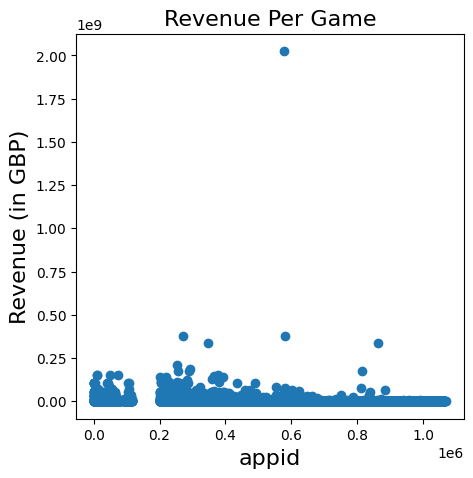

In [111]:
plt.figure(figsize=(5,5))
plt.xlabel("appid", fontsize=16)
plt.ylabel("Revenue (in GBP)", fontsize=16)
plt.title("Revenue Per Game", fontsize=16)
plt.scatter(x=games_df['appid'], y=games_df['est_revenue'])
plt.show()

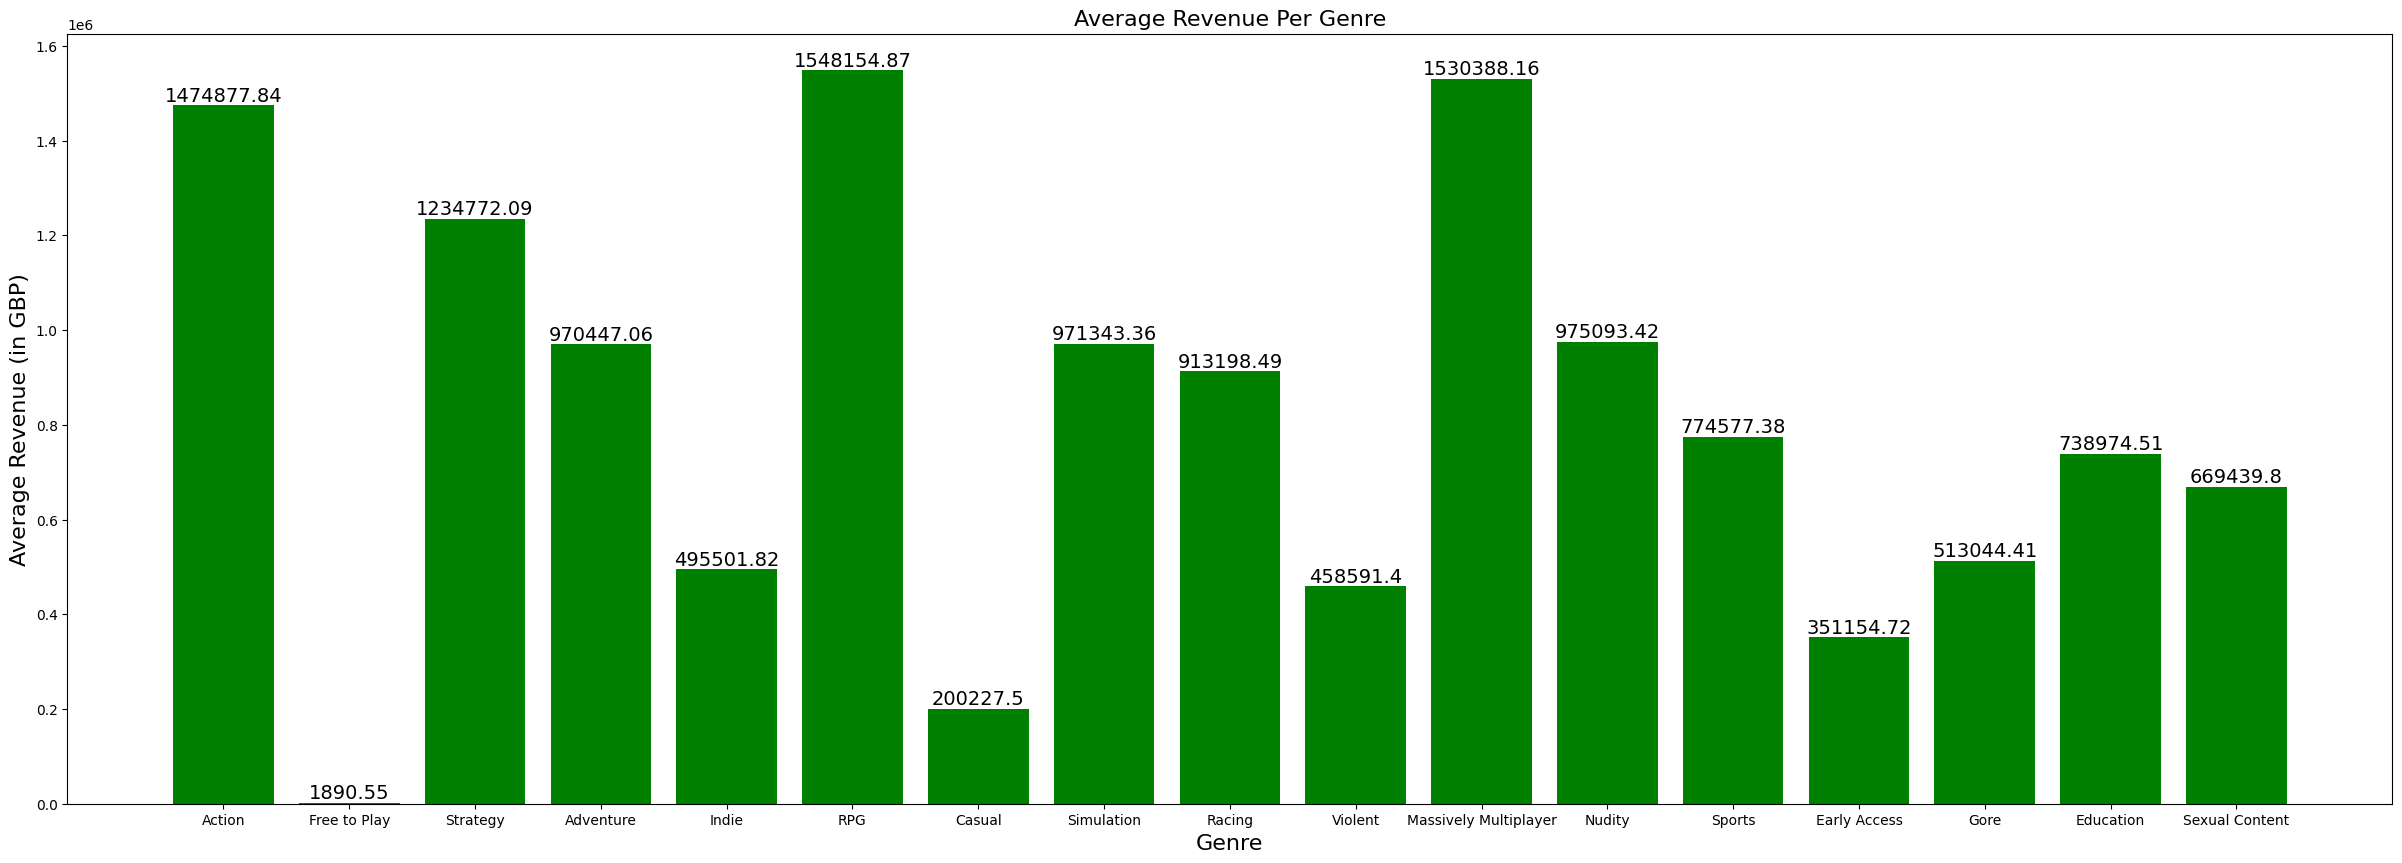

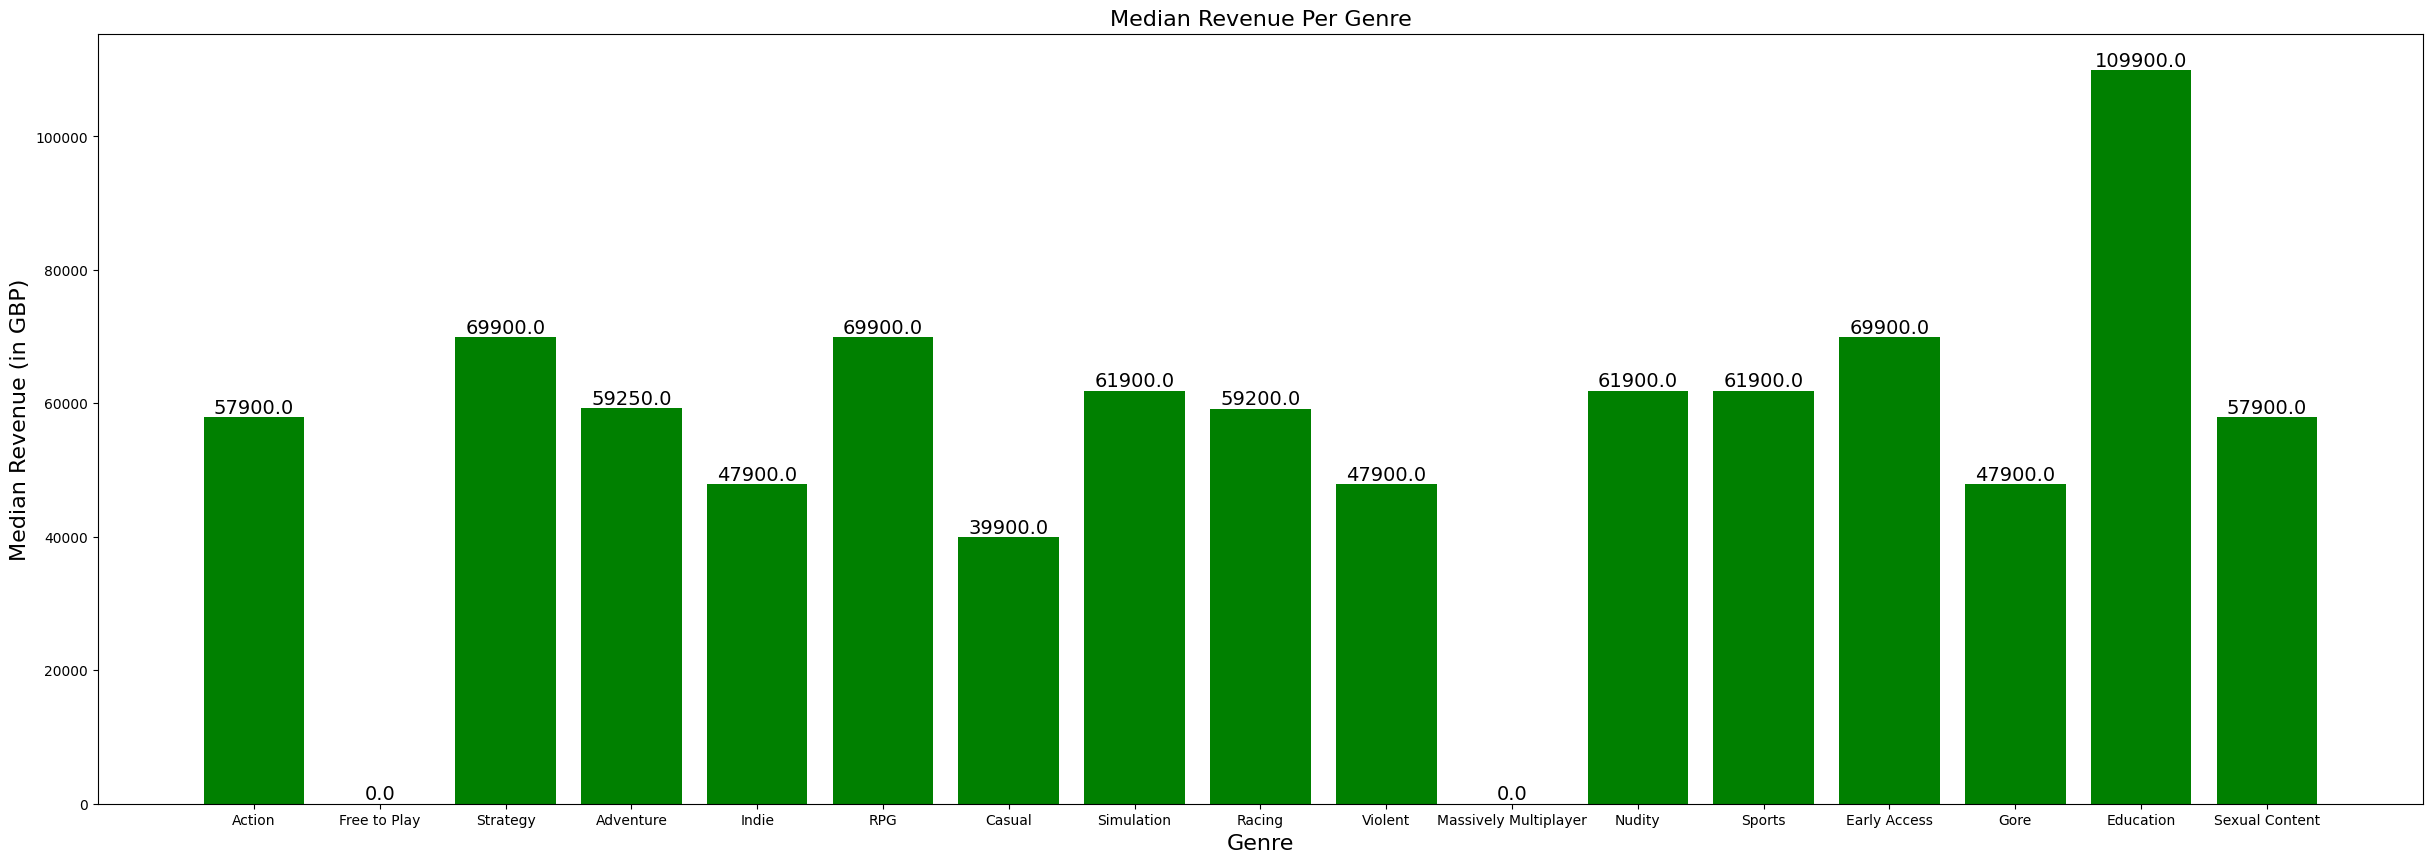

In [112]:
genres = ['Action', 'Free to Play', 'Strategy', 'Adventure', 'Indie', 'RPG', 'Casual', 'Simulation', 'Racing', 'Violent', \
    'Massively Multiplayer', 'Nudity', 'Sports', 'Early Access', 'Gore', 'Education', 'Sexual Content']

plt.figure(figsize=(30,10))
plt.xlabel("Genre", fontsize=16)
plt.ylabel("Average Revenue (in GBP)", fontsize=16)
plt.title("Average Revenue Per Genre", fontsize=16)

genre_to_rev = {}
# For each genre we will plot the average revenue
for genre in genres:
    # Filter the df to just include the rows/games which are the genre 'genre'
    filtered_df = games_df.loc[games_df["genre_" + genre] == 1]
    # There is only one game with a revenue of more than 0.5*10^9 (has value 2*10^9)
    # We can drop this outlier.
    filtered_df = filtered_df.drop(filtered_df[filtered_df["est_revenue"] > 0.5*10**9].index)
    # Round to avoid long chart labels
    genre_to_rev.update({genre : round(mean(filtered_df['est_revenue']), 2)})

barplot = plt.bar(genre_to_rev.keys(), genre_to_rev.values(), color='green')
plt.bar_label(barplot, labels=genre_to_rev.values(), fontsize=14)
plt.show()

plt.figure(figsize=(30,10))
plt.xlabel("Genre", fontsize=16)
plt.ylabel("Median Revenue (in GBP)", fontsize=16)
plt.title("Median Revenue Per Genre", fontsize=16)

genre_to_rev = {}
# For each genre we will plot the median revenue
for genre in genres:
    # Filter the df to just include the rows/games which are the genre 'genre'
    filtered_df = games_df.loc[games_df["genre_" + genre] == 1]
    # There is only one game with a revenue of more than 0.5*10^9 (has value 2*10^9)
    # We can drop this outlier.
    filtered_df = filtered_df.drop(filtered_df[filtered_df["est_revenue"] > 0.5*10**9].index)
    # Round to avoid long chart labels
    genre_to_rev.update({genre : round(median(filtered_df['est_revenue']), 2)})

barplot = plt.bar(genre_to_rev.keys(), genre_to_rev.values(), color='green')
plt.bar_label(barplot, labels=genre_to_rev.values(), fontsize=14)
plt.show()

As we can see, in terms of average revenue over all games, Action, RPG, and Massively Multiplayer games<br>
are the most successful. These three genres have a very similar average revenue and are significantly ahead<br>
of the next closest genre (Strategy games). All of these games have an average revenue of over £1,000,000.<br>
<br>
The 4 genres which have the highest **average** revenue (descending):<br>
1) RPG<br>
2) Massively Multiplayer<br>
3) Action<br>
4) Strategy.<br>


This is extremely different when we instead look at the median revenue. For all 17 genres, the median revenue<br>
is significantly less than the average revenue.<br>
<br>
The 4 genres which have the highest **median** revenue (descending):<br>
1) Education<br>
2) Strategy, RPG, Early Access (tied)<br>
3) Simulation, Nudity, Sports (tied)<br>
4) Adventure<br>


Since all of the median revenues are significantly less than the average revenues, this indicates that<br>
a small percent of the games in each genre have a very high revenue. This is especially prevalent in the<br>
RPG, Massively Multiplayer, Action, and Strategy genres since they experience the most dramatic drop.<br>
This is not too suprising. Many games may go unnoticed or get little traction, while some games will<br>
become very popular. This just shows us that RPG, Massively Multiplayer, Action, and Strategy genres<br>
experience this the greatest: some of the games in these genres become extremely popular (more so than<br>
other genres).<br>

In [113]:
print("The number of Education games:")
print(sum(games_df['genre_Education']))
print("The number of Massively Multiplayer games:")
print(sum(games_df["genre_Massively Multiplayer"]))
print("The number of Free Massively Multiplayer games:")
print(len(games_df.loc[(games_df["genre_Massively Multiplayer"] == 1) & (games_df["price"] == 0)]))

The number of Education games:
51
The number of Massively Multiplayer games:
723
The number of Free Massively Multiplayer games:
375


A couple other interesting results from these graphs are the median revenue of 0 for Massively Multiplayer<br>
games and the relatively high Education median. The median revenue of 0 for the Massively Multiplayer games<br>
can be explained by the fact that over half of the Massively Multiplayer games are free to play.<br>
The high median revenue for the Education games can be explained by the fact that there are so few Education<br>
games.<br>
<br>
As an aside, it should be noted that the 'Free to Play' genre obviously has a revenue of 0, so this metric<br>
is not useful for evaluating the success of Free to Play games.<br>

##### **Playtime**

Now let's look at the average playtimes for each of these genres.

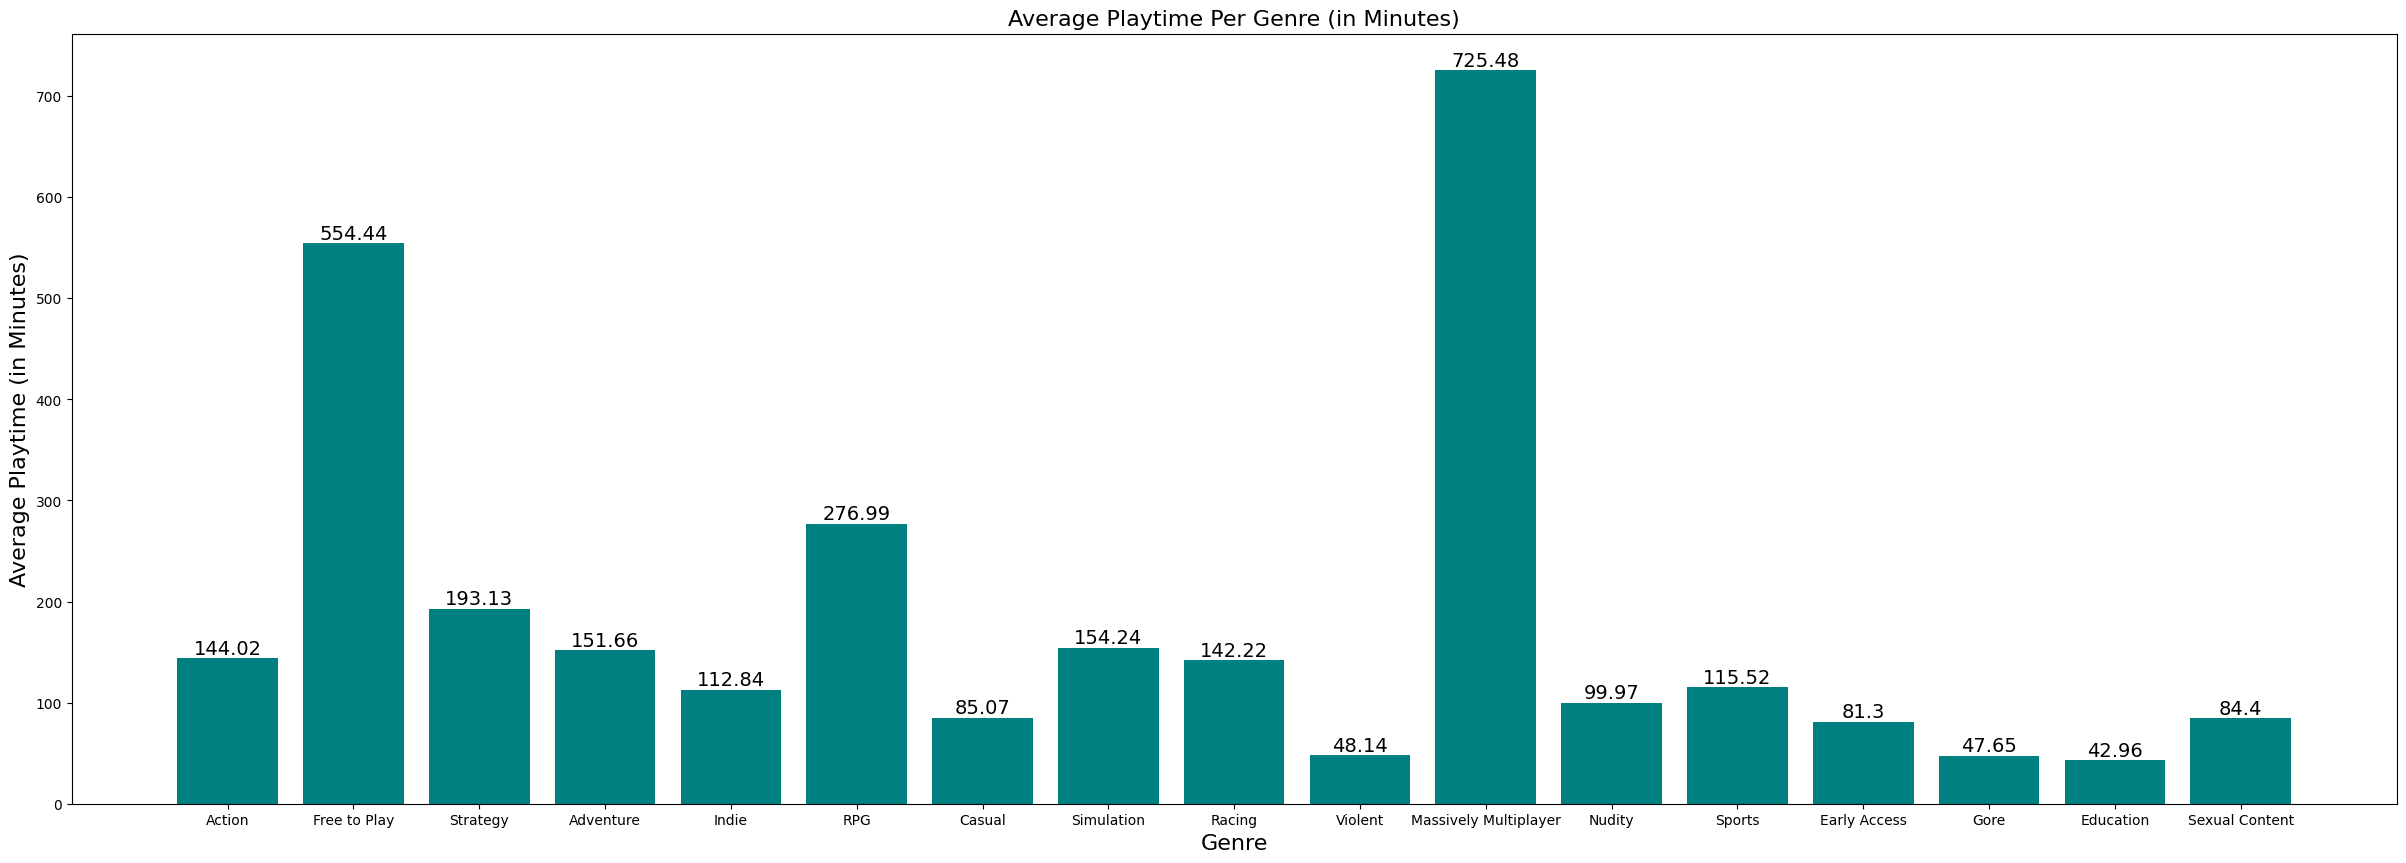

In [114]:
genres = ['Action', 'Free to Play', 'Strategy', 'Adventure', 'Indie', 'RPG', 'Casual', 'Simulation', 'Racing', 'Violent', \
    'Massively Multiplayer', 'Nudity', 'Sports', 'Early Access', 'Gore', 'Education', 'Sexual Content']

plt.figure(figsize=(30,10))
plt.xlabel("Genre", fontsize=16)
plt.ylabel("Average Playtime (in Minutes)", fontsize=16)
plt.title("Average Playtime Per Genre (in Minutes)", fontsize=16)

genre_to_playtime = {}
# For each genre we will plot the average playtime
for genre in genres:
    # Filter the df to just include the rows/games which are the genre 'genre'
    filtered_df = games_df.loc[games_df["genre_" + genre] == 1]
    # Round to avoid long chart labels
    genre_to_playtime.update({genre : round(mean(filtered_df['average_playtime']), 2)})

barplot = plt.bar(genre_to_playtime.keys(), genre_to_playtime.values(), color='teal')
plt.bar_label(barplot, labels=genre_to_playtime.values(), fontsize=14)
plt.show()

We can very clearly see that there are two genres which lead by a substantial margin in terms<br>
of average playtime: Massively Multiplayer games and Free to Play games. Massively Multiplayer<br>
games have an average playtime of 725 minutes (just over 12 hours), Free to Play games have an<br>
average playtime of 554 minutes (9.23 hours), and the next closest genre is RPG with an average<br>
playtime of 277 minutes (4.62 hours) (half of the Free to Play playtime).<br>
<br>
Why are these two genres so far ahead of the others? One aspect could be the accessibility of<br>
these genres. There is a lot of overlap between Free to Play and Massively Multiplayer games<br>
as discussed above (over half of the Massively Multiplayer games are Free to Play). Games being<br>
free means anyone can play it without spending a dime. Players don't have to worry about purchasing<br>
a game just to learn they don't like it. So, many Massively Multiplayer games have the advantage of<br>
being Free to Play, increasing the accessibility of the games. But why Free Massively Multiplayer games<br>
and not Free Racing games, or Free Adventure games? What makes Massively Multiplayer so special?<br>
With Massively Multiplayer games, players are able to (obviously) play with and against other players.<br>
The collaboration with other players or friends to beat an opponent is very exciting. There is so much<br>
uncertainty about the outcome and experience you will have while playing because you are playing with<br>
other human players which are not predictable like an AI player. This makes the game extremely replayable.<br>
(source and more info on replayablity: https://medium.com/super-jump/replayability-in-game-design-798fbb91a726)<br>
<br>
But why does the Free to Play genre alone have such a high playtime?

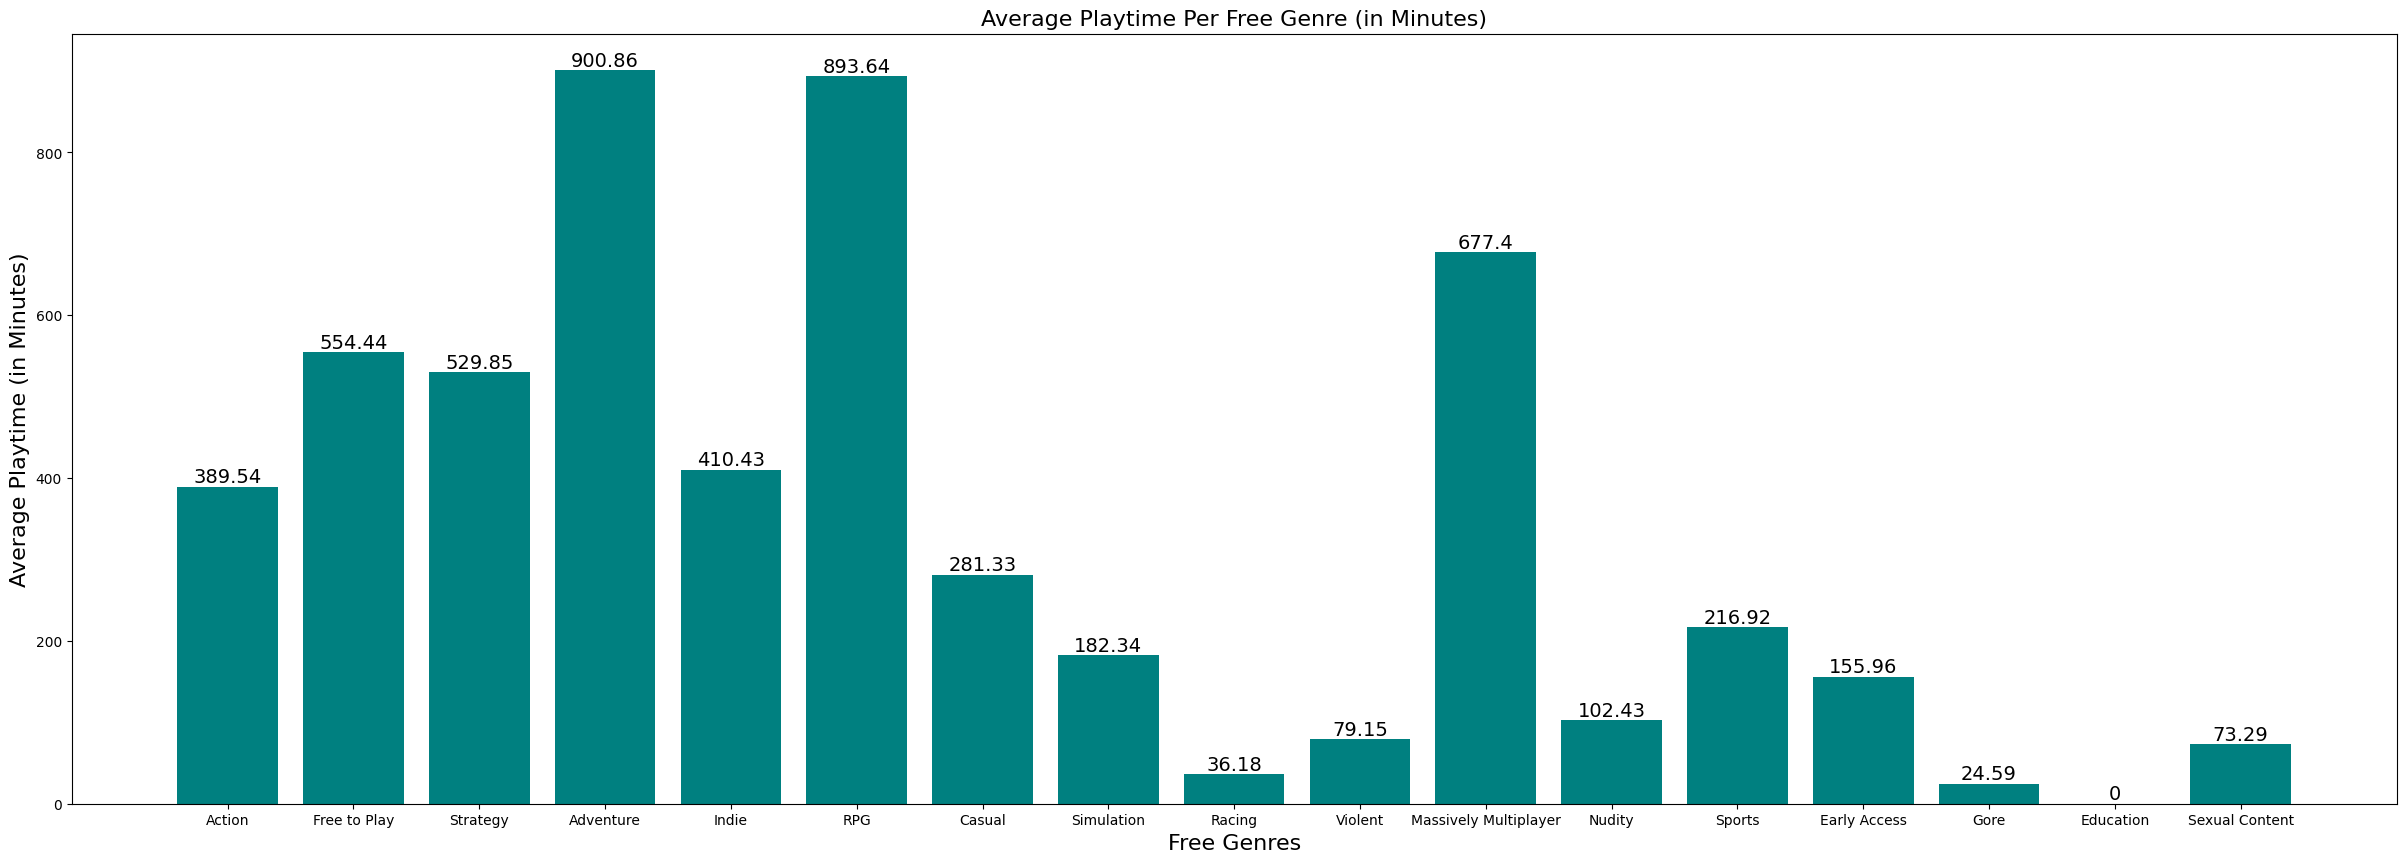

In [115]:
plt.figure(figsize=(30,10))
plt.xlabel("Free Genres", fontsize=16)
plt.ylabel("Average Playtime (in Minutes)", fontsize=16)
plt.title("Average Playtime Per Free Genre (in Minutes)", fontsize=16)

free_games = games_df.loc[games_df["genre_Free to Play"] == 1]
genre_to_playtime = {}
for genre in genres:
    # Filter the df to just include the rows/games which are the genre 'genre'
    free_genre_games = free_games.loc[games_df["genre_" + genre] == 1]
    # Round to avoid long chart labels
    genre_to_playtime.update({genre : round(mean(free_genre_games['average_playtime']), 2)})

barplot = plt.bar(genre_to_playtime.keys(), genre_to_playtime.values(), color='teal')
plt.bar_label(barplot, labels=genre_to_playtime.values(), fontsize=14)
plt.show()

Above is a graph of the average playtimes for each genre which is also free to play (e.g., free action games).<br>
We can see that free adventure, RPG, and massively multiplayer games are what give the Free to Play genre<br>
a high average playtime of 554 minutes (all other genres lower this average). We have already explained the high<br>
playtime of massively multiplayer games, but what makes free adventure and free RPG games so replayable?<br>
RPG means Role Playing Game. In an RPG, you play as a fictional character in a fictional world. The world is<br>
often large with many quests/tasks to do. They also tend to have a sense of progression (e.g., leveling) in which<br>
you improve your character. Much of what the player does is up to the player: what you want your character to be,<br>
what quests you want to do, where you want to explore, etc. This provides many hours of content. Adventure games<br>
are a more broad genre. RPGs can be thought of as a subset of adventure games. Adventure games often feature a large<br>
open world, a story, fantasy elements, action (some combination of these), and many other elements. These elements<br>
give the game a lot of content which the player can enjoy for many hours.<br>
(sources and more info:<br>
https://www.techopedia.com/definition/27052/role-playing-game-rpg<br>
https://store.steampowered.com/category/adventure)

##### **Ratings**

Now let's look at the average ratings of games for each of these genres.

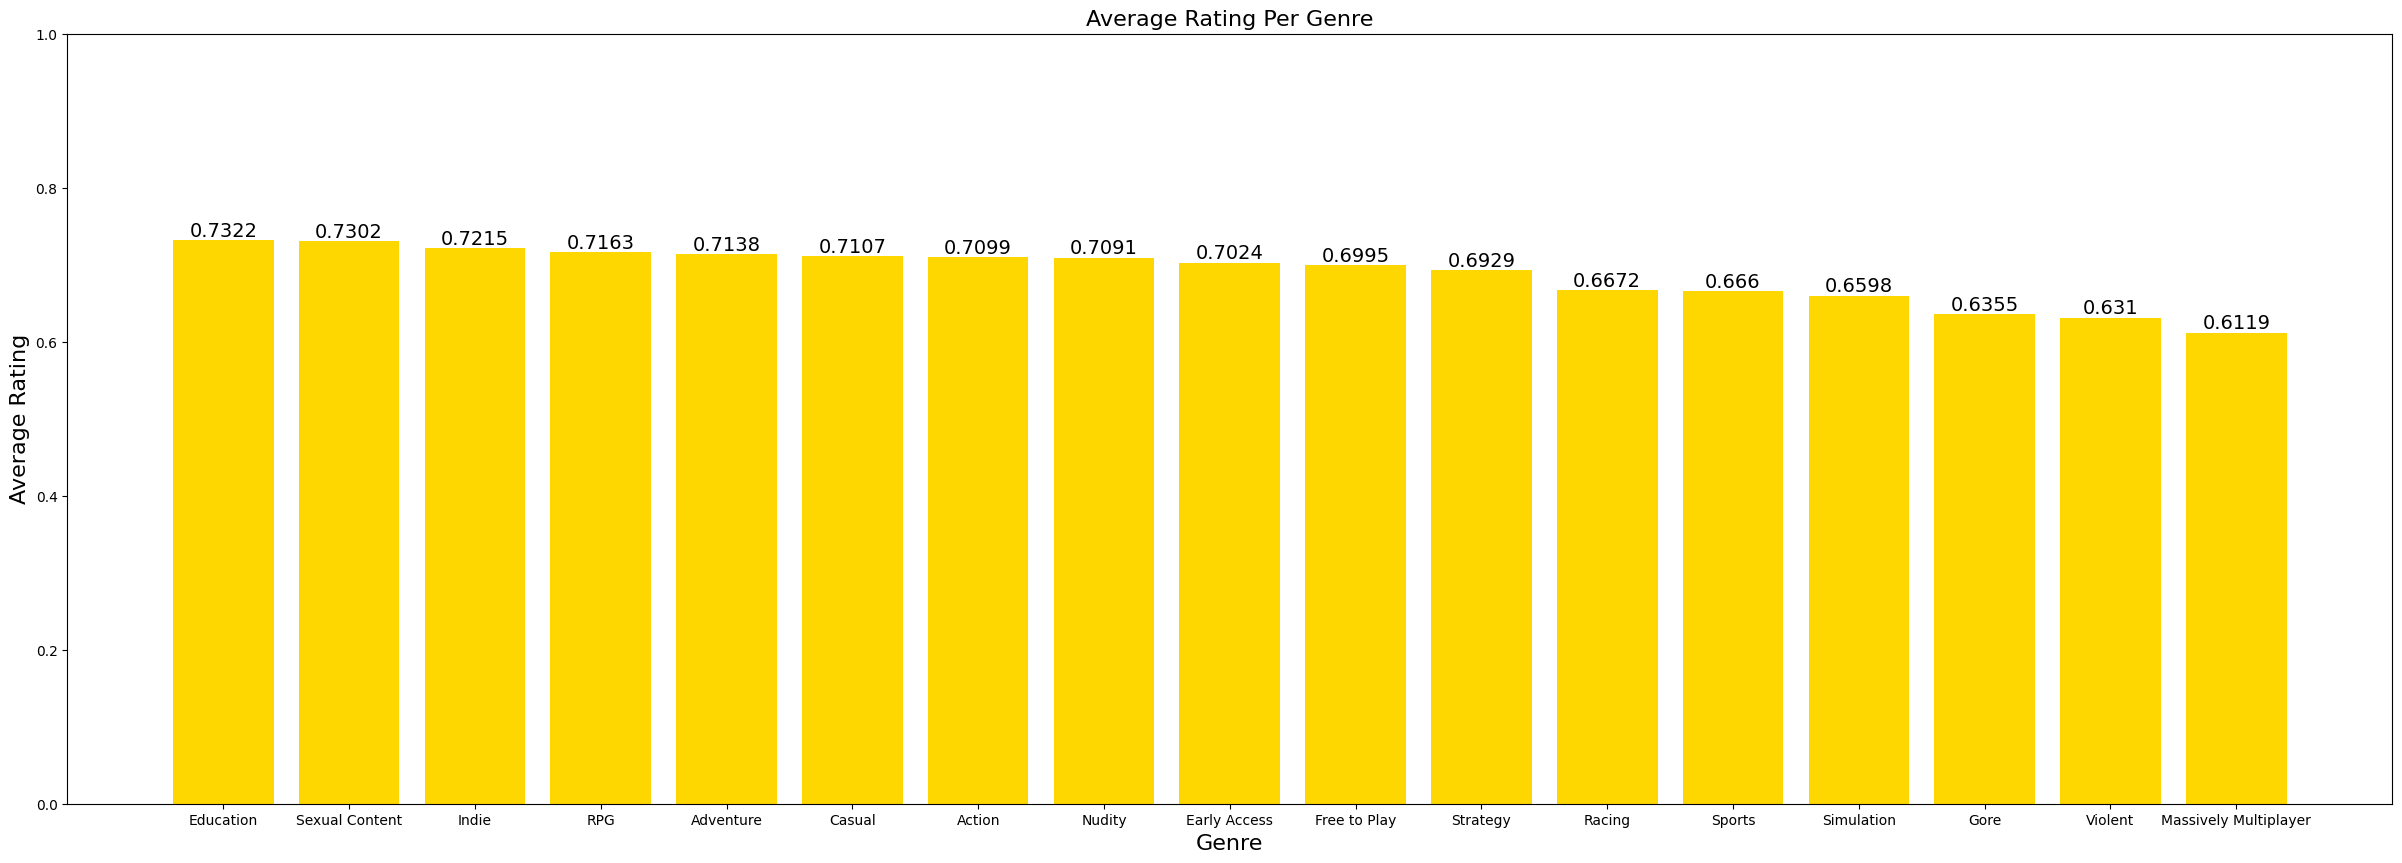

In [116]:
genres = ['Action', 'Free to Play', 'Strategy', 'Adventure', 'Indie', 'RPG', 'Casual', 'Simulation', 'Racing', 'Violent', \
    'Massively Multiplayer', 'Nudity', 'Sports', 'Early Access', 'Gore', 'Education', 'Sexual Content']

plt.figure(figsize=(30,10))
plt.xlabel("Genre", fontsize=16)
plt.ylabel("Average Rating", fontsize=16)
plt.title("Average Rating Per Genre", fontsize=16)

genre_to_rating = {}
# For each genre we will plot the average rating
for genre in genres:
    # Filter the df to just include the rows/games which are the genre 'genre'
    filtered_df = games_df.loc[games_df["genre_" + genre] == 1]
    # Round to avoid long chart labels
    genre_to_rating.update({genre : round(mean(filtered_df['rating']), 4)})

# Sort genre_to_rating in descending order
sorted_dict = dict(sorted(genre_to_rating.items(), key=lambda x:x[1], reverse=True))
barplot = plt.bar(sorted_dict.keys(), sorted_dict.values(), color='gold')
plt.bar_label(barplot, labels=sorted_dict.values(), fontsize=14)
plt.ylim([0, 1])
plt.show()

There is not nearly as much variation between genres as there was when we looked at revenue or playtime.<br>
However, there are still some suprising and interesting results. The first being the average rating of<br>
Massively Multiplayer games. It is the lowest by a pretty substantial margin. The rating is 2% lower than the<br>
next lowest rated genre, Violent games. This is suprising given how strongly favored Massively Multiplayer games<br>
are in terms of revenue and playtime. What might be the reason for this?<br>
<br>
Let's look at two of the most popular massively multiplayer games on steam: New World and Lost Ark. One <br>
reviewer of New World writes "after over 1300 hours I've come to realize that all you can expect from the <br>
New World experience is an unbalanced game, an uncaring moderation team, a ton of bots, and a ton of repeated <br>
disappointment. Uninstalled today." A player reviewing Lost Ark writes "A shame that perhaps the best MMO <br>
combat and raiding is locked behind greedy, predatory systems and incompetent publishing. Play a game that <br>
actually respects your time instead." In addition to my own personal experience, I think these two reviews <br>
summarize why massively multiplayer games have a comparatively low rating on average. Balancing of game mechanics<br>
(e.g., how powerful or weak a character, weapon, etc. is), botting (players using bots to do repetitive tasks <br>
in order to improve their character), and greedy publishers (e.g., free to play model but highly encouraging<br>
of using real money to improve your character) are all serious problems that many massively multiplayer games face.<br>
This leads many players to negatively rate the game.<br>
(sources: https://steamcommunity.com/profiles/76561199192443255/recommended/1063730/,<br>
https://steamcommunity.com/id/jayd0/recommended/1599340/)<br>
<br>
Let's now look at what genres have the highest ratings. The top 5 genres are (descending): Education, Sexual<br>
Content, Indie, RPG, and Adventure. We have already discussed why RPG and Adventure games would be enjoyable,<br>
but what about the other three? As we discussed earlier with Education games, there are not many. We only have 51<br>
Education games in our dataset (out of over 27,000), so it might not be fair to say that this is our #1 genre.<br>
However, it is still highly rated. This may be because, while there are only a few, the few do what they intend to do well:<br>
teach the player. Sexual content games are popular for the same reasons that sexually explicit videos are popular<br>
with the added element of being in control of the game. An indie game is a game created by an independent game developer<br>
as opposed to a large corporation. Because indie games are only created by a small team or a single person in some cases,<br>
the game is often very unique and has a lot of personality. Additionally, indie developers communicate with players much<br>
easier and more often than a large game company. This allows easier player feedback, leading to a better game.<br>
These are some reasons why the indie genre may be number 3 on this list.<br>
(source and more info on indie games: https://gamemaker.io/en/blog/what-are-indie-games)<br>

#### **3.2 Game Categories and Success**
We will now look at how the game category relates to its success. Categories and genres are<br>
not too different from one another, so we should expect similar results to that of genres<br>
(e.g., massively multiplayers are a successful genre, so 'multiplayer' or 'online' categories<br>
will likely be successful as well).<br>
Again, we will look at revenue, playtime, and ratings to determine success.<br>

In [117]:
print(unique_col_elts('categories'))

categories = ['Multi-player', 'Online Multi-Player', 'Local Multi-Player', 'Single-player', 'Partial Controller Support',
'Cross-Platform Multiplayer', 'Includes level editor', 'In-App Purchases', 'Co-op', 'Full controller support',
'Online Co-op', 'Shared/Split Screen', 'Local Co-op', 'MMO', 'VR Support', 'Mods', 'Mods (require HL2)']
for cat in categories:
    print("Num entries of category " + cat + ":", len(games_df.loc[games_df["category_" + cat] == 1]))

Unique entries:
['Multi-player', 'Online Multi-Player', 'Local Multi-Player', 'Valve Anti-Cheat enabled', 'Single-player', 'Steam Cloud', 'Steam Achievements', 'Steam Trading Cards', 'Captions available', 'Partial Controller Support', 'Includes Source SDK', 'Cross-Platform Multiplayer', 'Stats', 'Commentary available', 'Includes level editor', 'Steam Workshop', 'In-App Purchases', 'Co-op', 'Full controller support', 'Steam Leaderboards', 'SteamVR Collectibles', 'Online Co-op', 'Shared/Split Screen', 'Local Co-op', 'MMO', 'VR Support', 'Mods', 'Mods (require HL2)', 'Steam Turn Notifications']
Length:
29
None
Num entries of category Multi-player: 3974
Num entries of category Online Multi-Player: 2487
Num entries of category Local Multi-Player: 1615
Num entries of category Single-player: 25678
Num entries of category Partial Controller Support: 4234
Num entries of category Cross-Platform Multiplayer: 1081
Num entries of category Includes level editor: 1036
Num entries of category In-App P

There are a lot of categories that aren't related to video games, so we will ignore these.<br>
<br>
From the above list, we will look at 15:<br>
<br>
Multi-player, Online Multi-Player, Local Multi-Player, Single-player, Partial Controller Support,<br>
Cross-Platform Multiplayer, Includes level editor, In-App Purchases, Co-op, Full controller support,<br>
Online Co-op, Shared/Split Screen, Local Co-op, MMO, VR Support<br>
<br>
So, we will ignore 14:<br>
<br>
Valve Anti-Cheat enabled, Steam Cloud, Steam Achievements, Steam Trading Cards, Captions available,<br>
Includes Source SDK, Stats, Commentary available, Steam Workshop, Steam Leaderboards, SteamVR Collectibles,<br>
Steam Turn Notifications<br>
<br>
We are also ignoring 'Mods' and 'Mods (require HL2)' as there are only 2 and 1 entries for these.

##### **Revenue**
Let's begin by looking at how much a game in each of the different categories makes on average.

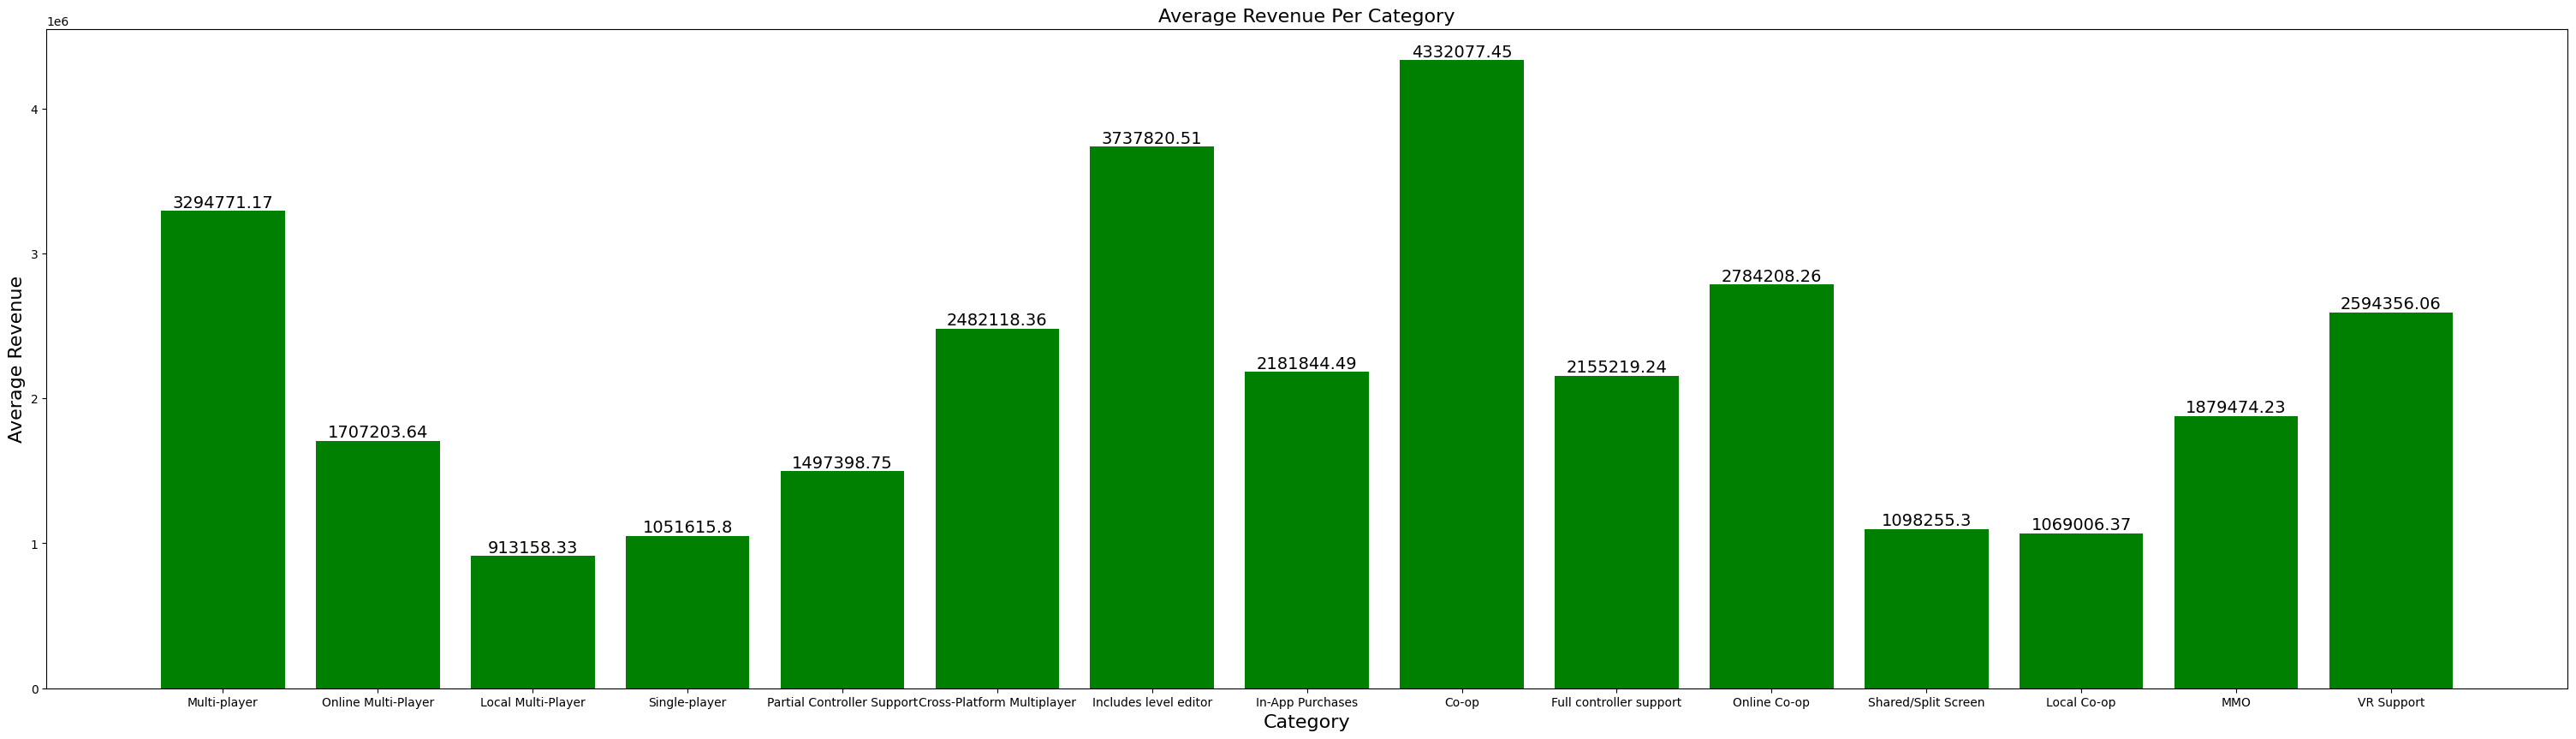

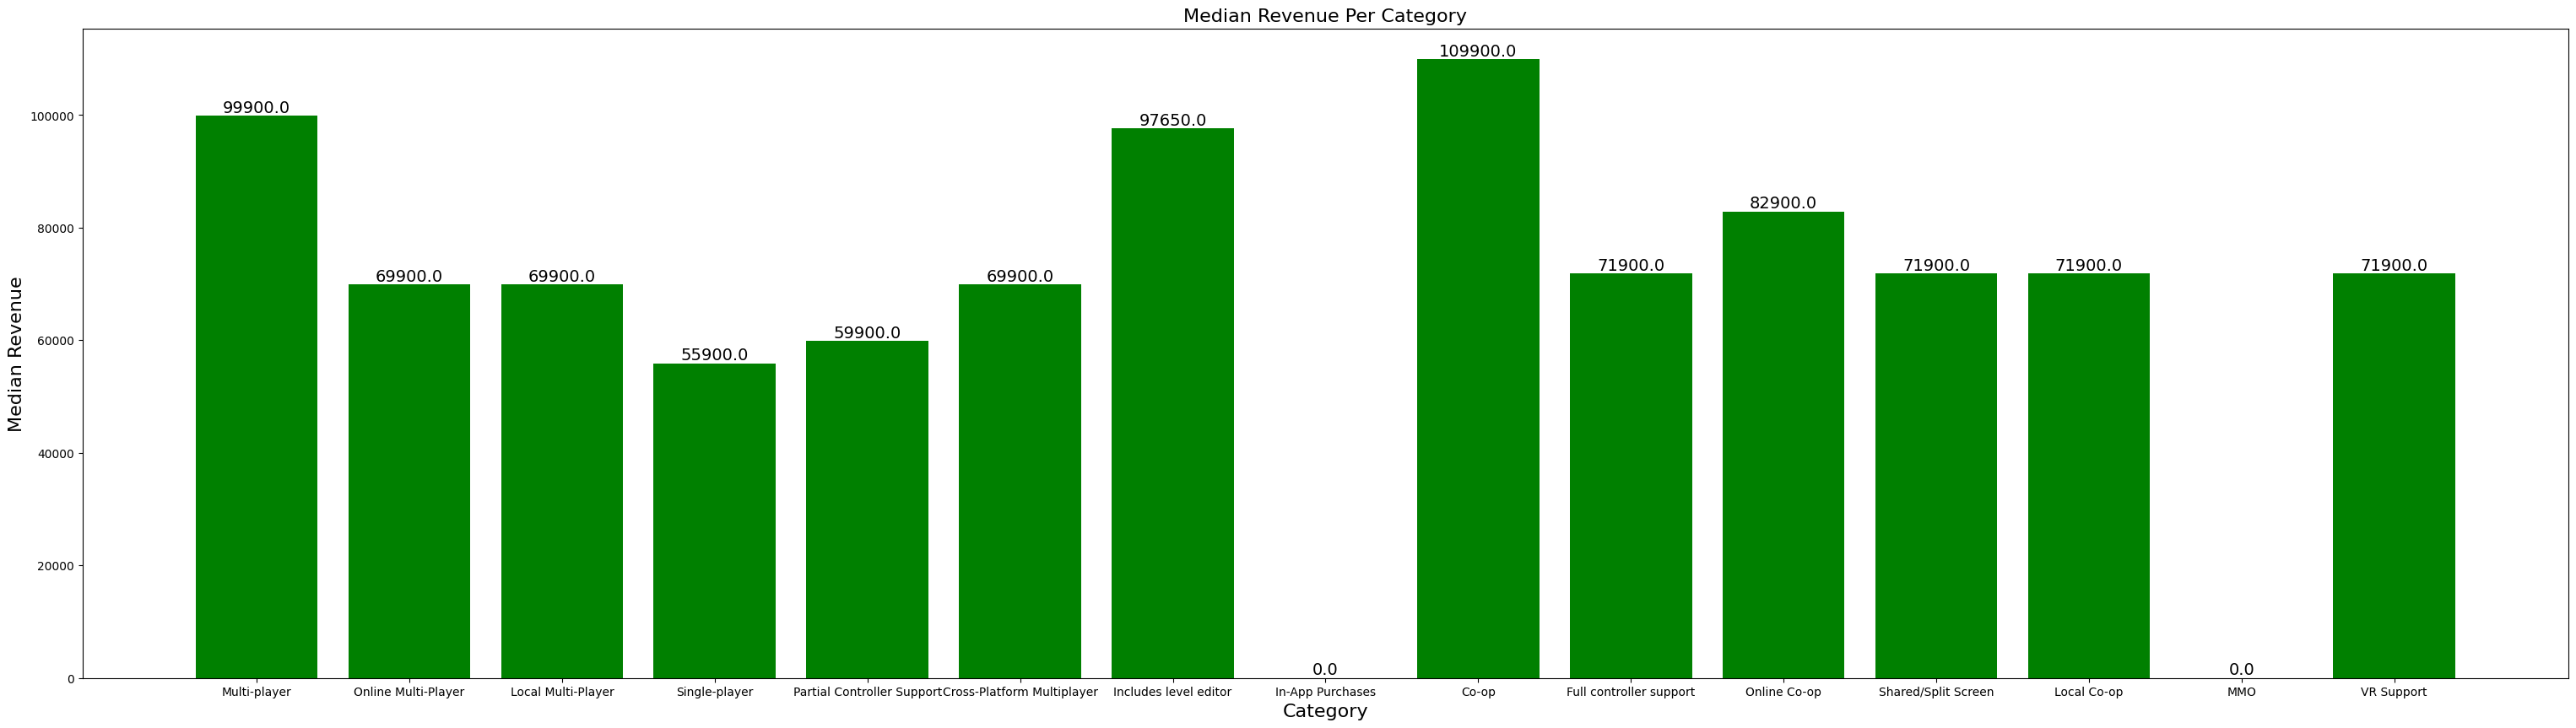

Number of 'Includes level editor' games:  1036


In [118]:
categories = ['Multi-player', 'Online Multi-Player', 'Local Multi-Player', 'Single-player', 'Partial Controller Support',
'Cross-Platform Multiplayer', 'Includes level editor', 'In-App Purchases', 'Co-op', 'Full controller support',
'Online Co-op', 'Shared/Split Screen', 'Local Co-op', 'MMO', 'VR Support']

plt.figure(figsize=(38,10))
plt.xlabel("Category", fontsize=16)
plt.ylabel("Average Revenue", fontsize=16)
plt.title("Average Revenue Per Category", fontsize=16)

cat_to_rev = {}
# For each category we will plot the average revenue
for cat in categories:
    # Filter the df to just include the rows/games which are the genre 'genre'
    filtered_df = games_df.loc[games_df["category_" + cat] == 1]
    # There is only one game with a revenue of more than 0.5*10^9 (has value 2*10^9)
    # We can drop this outlier.
    filtered_df = filtered_df.drop(filtered_df[filtered_df["est_revenue"] > 0.5*10**9].index)
    # Round to avoid long chart labels
    cat_to_rev.update({cat : round(mean(filtered_df['est_revenue']), 2)})

barplot = plt.bar(cat_to_rev.keys(), cat_to_rev.values(), color='green')
plt.bar_label(barplot, labels=cat_to_rev.values(), fontsize=14)
plt.show()

plt.figure(figsize=(38,10))
plt.xlabel("Category", fontsize=16)
plt.ylabel("Median Revenue", fontsize=16)
plt.title("Median Revenue Per Category", fontsize=16)

cat_to_rev = {}
# For each category we will plot the median revenue
for cat in categories:
    # Filter the df to just include the rows/games which are the genre 'genre'
    filtered_df = games_df.loc[games_df["category_" + cat] == 1]
    # There is only one game with a revenue of more than 0.5*10^9 (has value 2*10^9)
    # We can drop this outlier.
    filtered_df = filtered_df.drop(filtered_df[filtered_df["est_revenue"] > 0.5*10**9].index)
    # Round to avoid long chart labels
    cat_to_rev.update({cat : round(median(filtered_df['est_revenue']), 2)})

barplot = plt.bar(cat_to_rev.keys(), cat_to_rev.values(), color='green')
plt.bar_label(barplot, labels=cat_to_rev.values(), fontsize=14)
plt.show()
print("Number of 'Includes level editor' games: ", len(games_df.loc[games_df["category_Includes level editor"] == 1]))

For both the mean and median revenue per category, the top 3 categories are Co-op, Multiplayer, and Includes Level Editor.<br>
Two of these three are directly indicative of playing with other players. This suggests that players highly value being able to play<br>
with and against other players. The other category, includes level editor, suggests that players value being able to customize<br>
the game to suit their desires. An example of such a game is Trackmania Turbo which is a racing game where players can also<br>
create their own tracks and share and play these with others (examples of games with level editors:<br>
https://www.slant.co/topics/6445/~games-on-steam-with-a-level-editor).<br>
<br>
Side note: Co-op - a form of play or sport in which players work with one another in order to achieve a common objective.<br>
The goal of a co-op game is to reduce emphasis on competition and increase emphasis on the social aspects of play or sport<br>
(https://www.techtarget.com/whatis/definition/cooperative-games).

##### **Playtime**
Now let's look at the average playtime for each category

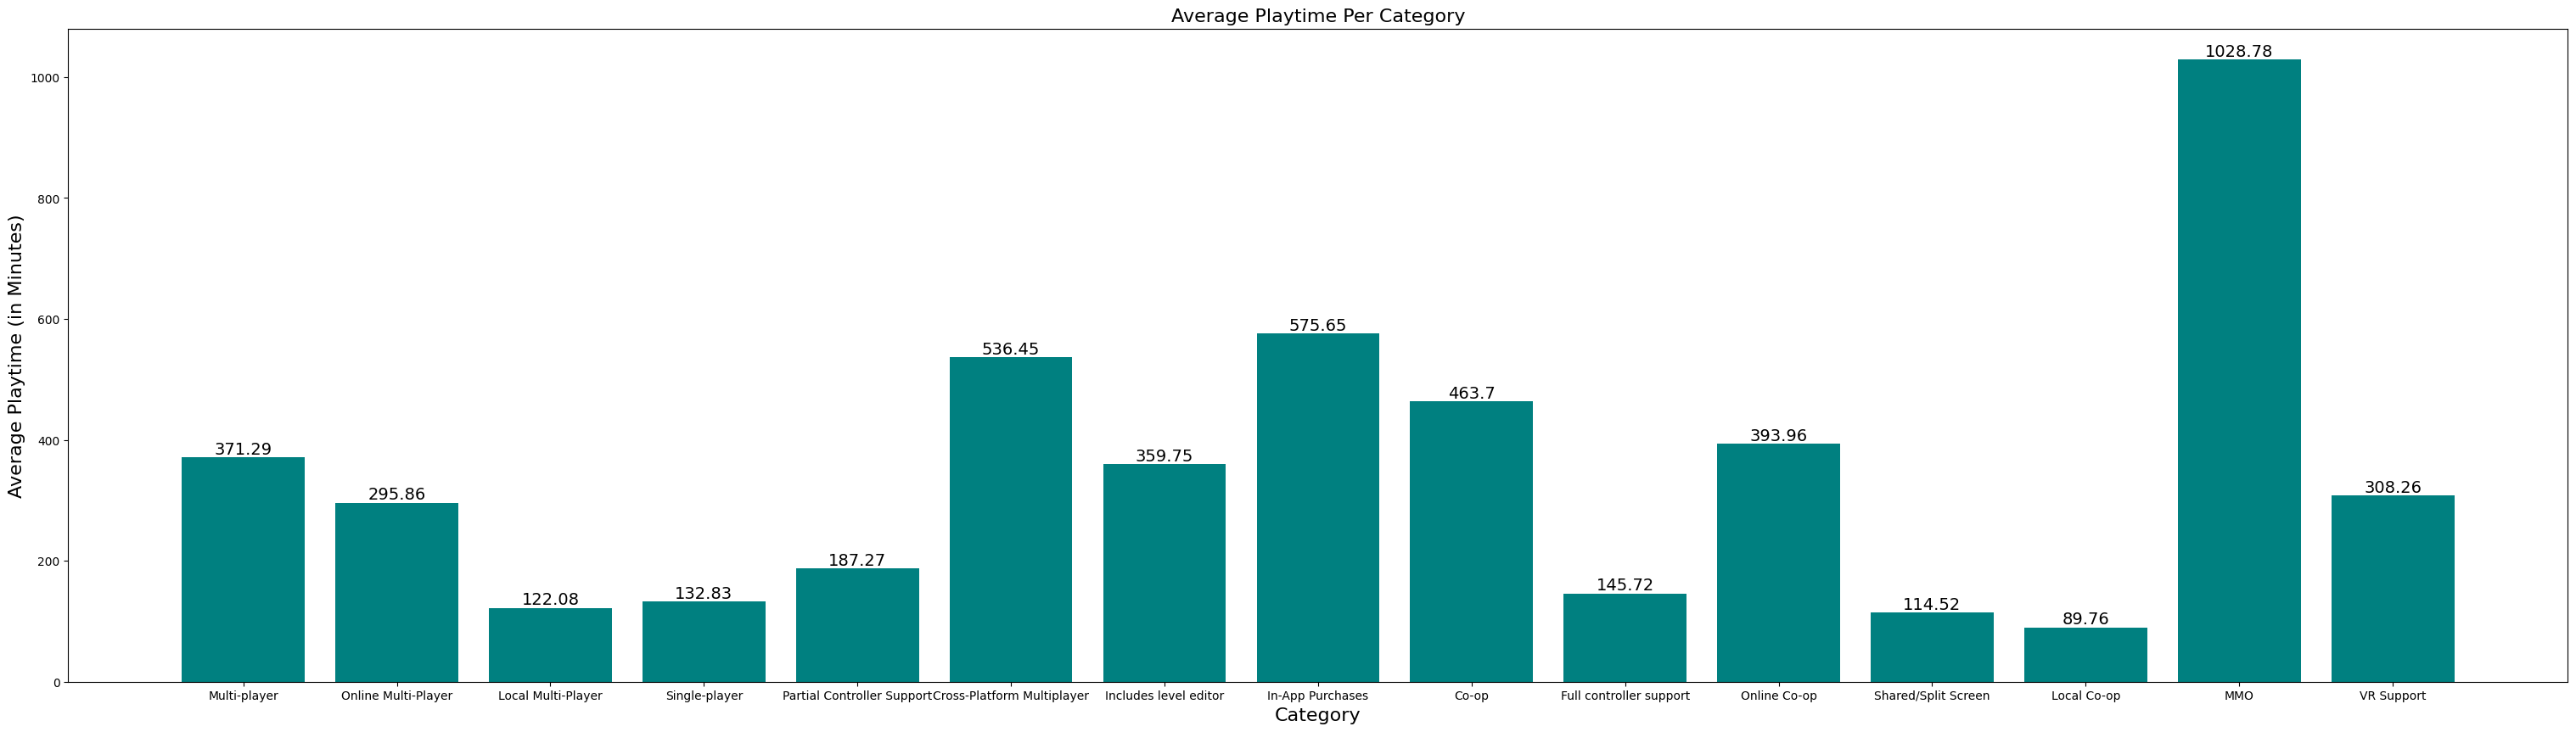

In [119]:
plt.figure(figsize=(38,10))
plt.xlabel("Category", fontsize=16)
plt.ylabel("Average Playtime (in Minutes)", fontsize=16)
plt.title("Average Playtime Per Category", fontsize=16)

cat_to_playtime = {}
# For each category we will plot the median revenue
for cat in categories:
    # Filter the df to just include the rows/games which are the genre 'genre'
    filtered_df = games_df.loc[games_df["category_" + cat] == 1]
    # Round to avoid long chart labels
    cat_to_playtime.update({cat : round(mean(filtered_df['average_playtime']), 2)})

barplot = plt.bar(cat_to_playtime.keys(), cat_to_playtime.values(), color='teal')
plt.bar_label(barplot, labels=cat_to_playtime.values(), fontsize=14)
plt.show()

TODO EXPLAIN RESULTS HERE TODO

##### **Ratings**

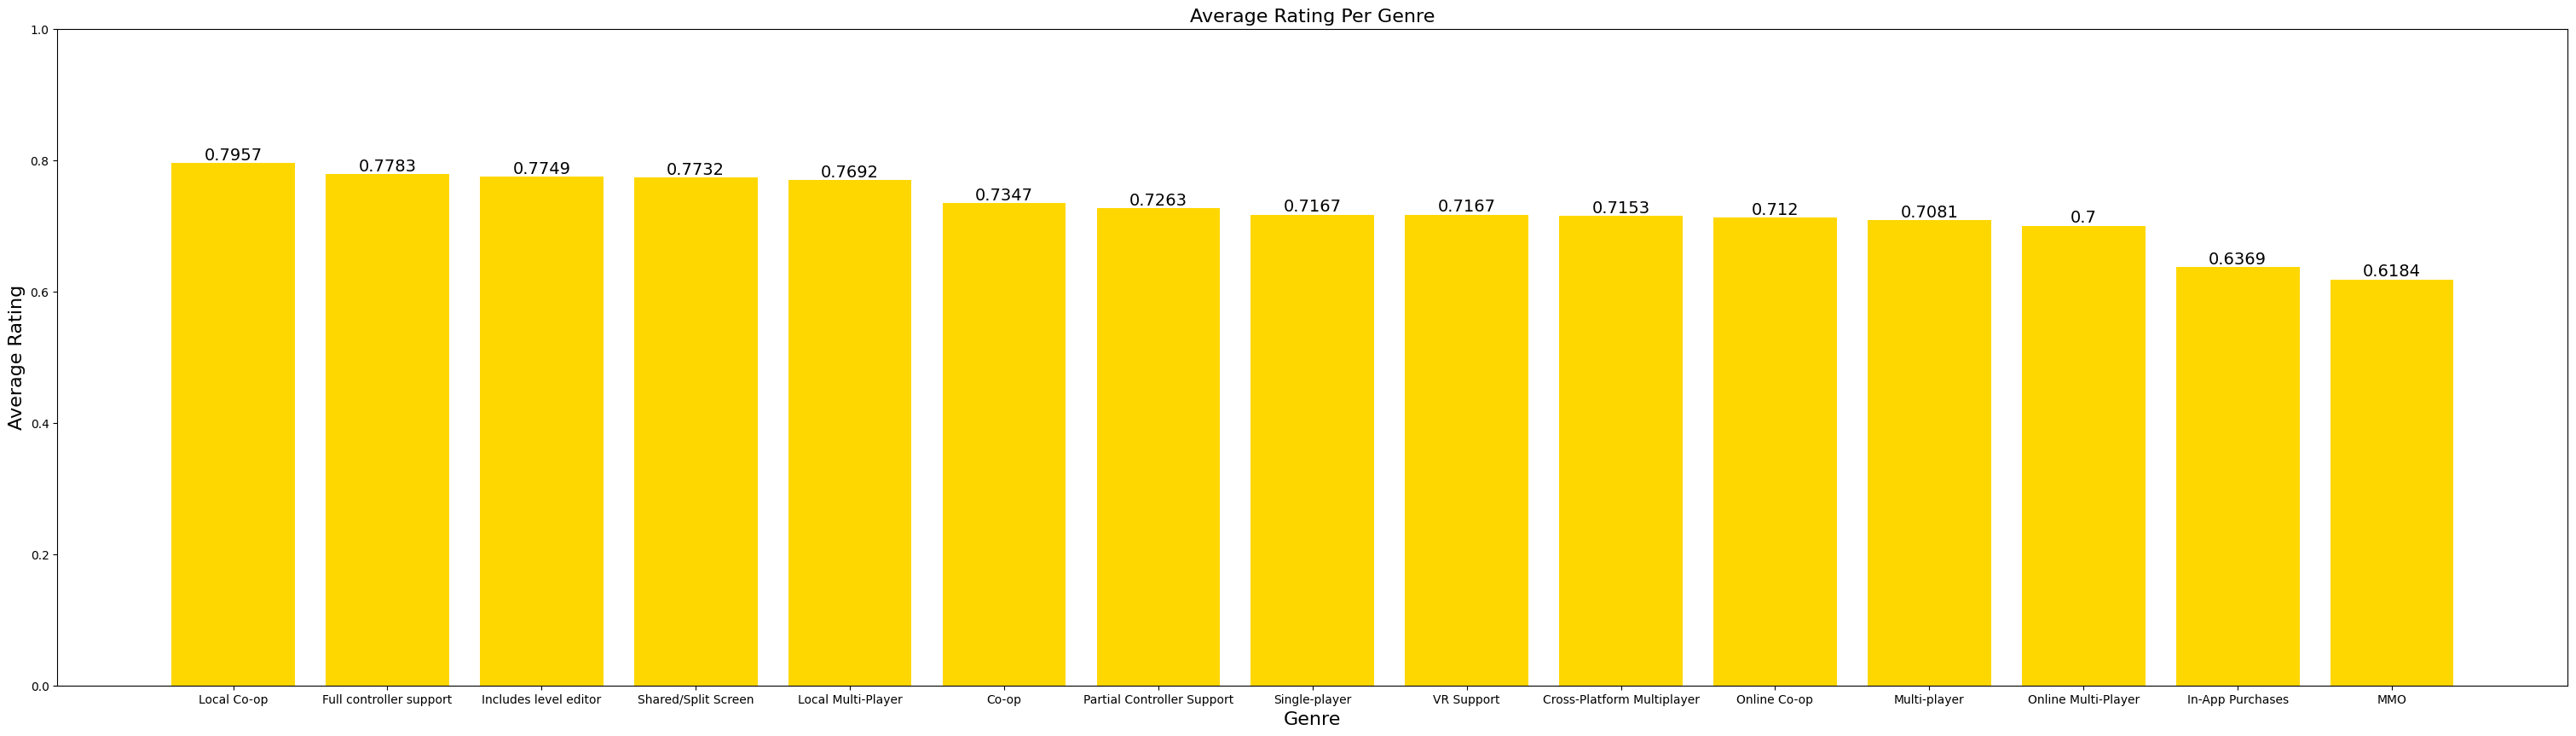

In [120]:
plt.figure(figsize=(38,10))
plt.xlabel("Genre", fontsize=16)
plt.ylabel("Average Rating", fontsize=16)
plt.title("Average Rating Per Genre", fontsize=16)

cat_to_rating = {}
# For each genre we will plot the average rating
for cat in categories:
    # Filter the df to just include the rows/games which are the genre 'genre'
    filtered_df = games_df.loc[games_df["category_" + cat] == 1]
    # Round to avoid long chart labels
    cat_to_rating.update({cat : round(mean(filtered_df['rating']), 4)})

# Sort cat_to_rating in descending order
sorted_dict = dict(sorted(cat_to_rating.items(), key=lambda x:x[1], reverse=True))
barplot = plt.bar(sorted_dict.keys(), sorted_dict.values(), color='gold')
plt.bar_label(barplot, labels=sorted_dict.values(), fontsize=14)
plt.ylim([0, 1])
plt.show()

TODO EXPLAIN RESULTS HERE TODO

#### **3.3 Game Price and Success**
Let's now see how the price of a game relates to it's success.<br>
Are more accessible (cheaper) games typically more successful? Or are expensive games more successful due to<br>
(what should be) a higher quality product?<br>
<br>
##### How we will evaluate our graphs:
The data may or may not be linearly related. We will fit a Linear Regression line for each set of variables we compare<br>
(e.g., Revenue of game vs Price), and we will measure how well this line fits by calculating the R-Squared value<br>
of the linear model. To account for the fact that the data may not be linearly related, we will also look at Spearman Rank Correlation.<br>
<br>
A brief overview of R-Squared: R-Squared is a metric that is used to evaluate the accuracy of a linear regression model.<br>
It represents the proportion of the variance in the dependent variable that is predicted by the model. The value is between<br>
zero and one. Zero means the model does not explain any of the variance in the dependent variable and one means that the model explains<br>
all of the variance in the dependent variable. (More information: https://www.investopedia.com/terms/r/r-squared.asp).<br>
<br>
A brief overview of Spearman Rank Correlation: The Spearman Rank Correlation coefficient is a value between -1 and 1,<br>
where a value of -1 indicates a perfect negative correlation, a value of 0 indicates no correlation, and a value of 1 indicates<br>
a perfect positive correlation. It does *not* assume the data has a linear relationship.<br>
(More information: https://towardsdatascience.com/how-to-measure-relationship-between-variables-d0606df27fd8).<br>
##### **Revenue**
We will graph the revenue of each game vs the price of the game and also fit a linear regression line to the scatter plot<br>
to see how price relates to revenue in general.<br>

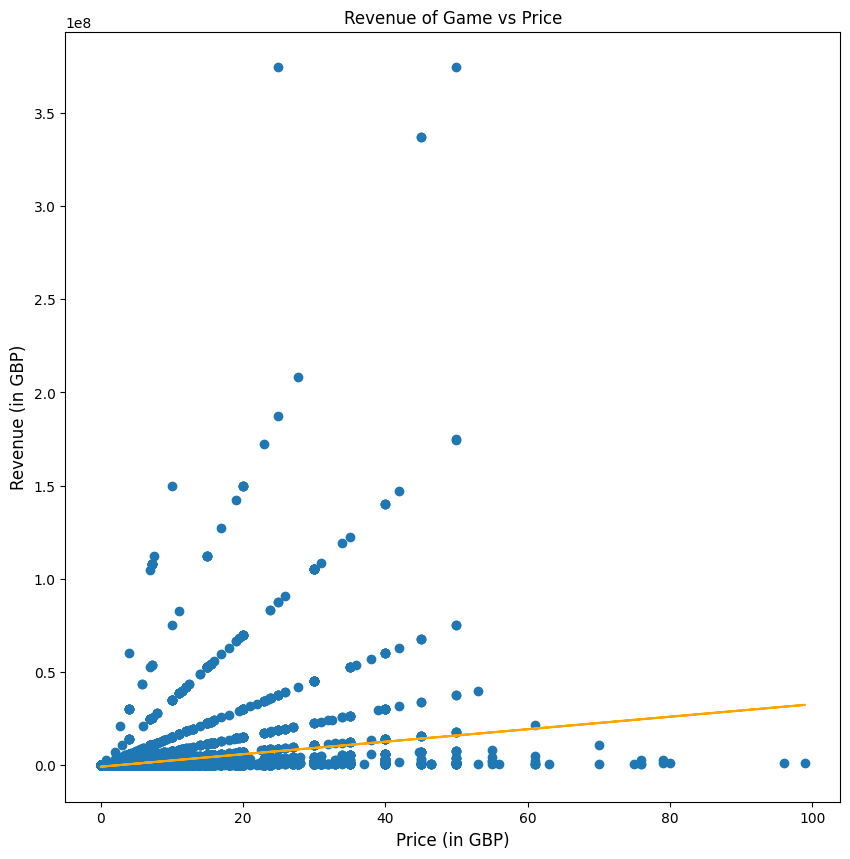

Slope of line:
[335584.10169458]
R Squared:  0.07756478770143238
Spearman Rank Correlation: 0.8367535231200439
p-value: 0.0


In [121]:
# Drop the major outlier
filtered_df = games_df.drop(games_df[games_df["est_revenue"] > 0.5*10**9].index)
# Drop those with a price > 100 as there are only a few games with that price and it makes our graph unreadable
filtered_df = filtered_df.drop(filtered_df[filtered_df["price"] > 100].index)
# Set up graph
plt.figure(figsize=(10,10))
plt.xlabel("Price (in GBP)", fontsize=12)
plt.ylabel("Revenue (in GBP)", fontsize=12)
plt.title("Revenue of Game vs Price", fontsize=12)
# Scatter plot of est_revenue vs price
plt.scatter(filtered_df['price'], filtered_df['est_revenue'])
# Now we fit a linear regression line to the graph
linreg = LinearRegression()
# The training values we use are the entire set of prices and revenues
x_train = np.array(filtered_df["price"]).reshape(-1, 1)
y_train = np.array(filtered_df["est_revenue"])
lin_model = linreg.fit(x_train, y_train)
# Predict y (revenue) from x (price)
plt.plot(filtered_df["price"], lin_model.predict(x_train), color='orange')
plt.show()
print("Slope of line:")
print(linreg.coef_)
# Evaluate how accurate our linear model is
print("R Squared: ", lin_model.score(x_train, y_train))
# Evaluate a relationship between x and y
corr, p_value = spearmanr(x_train, y_train)
print("Spearman Rank Correlation:", corr)
print("p-value:", p_value)

By looking at the scatter plot, we can see that it appears that as price increases so does revenue. This can be seen in <br>
the several increasing spokes of data points. Our linear regression line is not a good fit for the data, however, (R-Squared<br>
value close to 0) so our data does not have a strong linear relationship. The Spearman Rank Correlation and it's p-value,<br>
however, shows that the data has a very strong positive correlation (value close to 1), meaning that as price increases, so does<br>
revenue, confirming our initial thoughts. This is not too suprising given that, for example, a game that is £20 will have to sell<br>
3x as many copies as a £60 game to make the same revenue. Also, in general, higher priced games have more work that go into them<br>
which may lead to a higher quality game/more desirable game on average. It doesn't seem like a lower price/more accessible game<br>
is enough to cause the game to generate more revenue than a higher priced game on average.<br>
##### **Playtime**
Let's see how playtime relates to the price of the game.

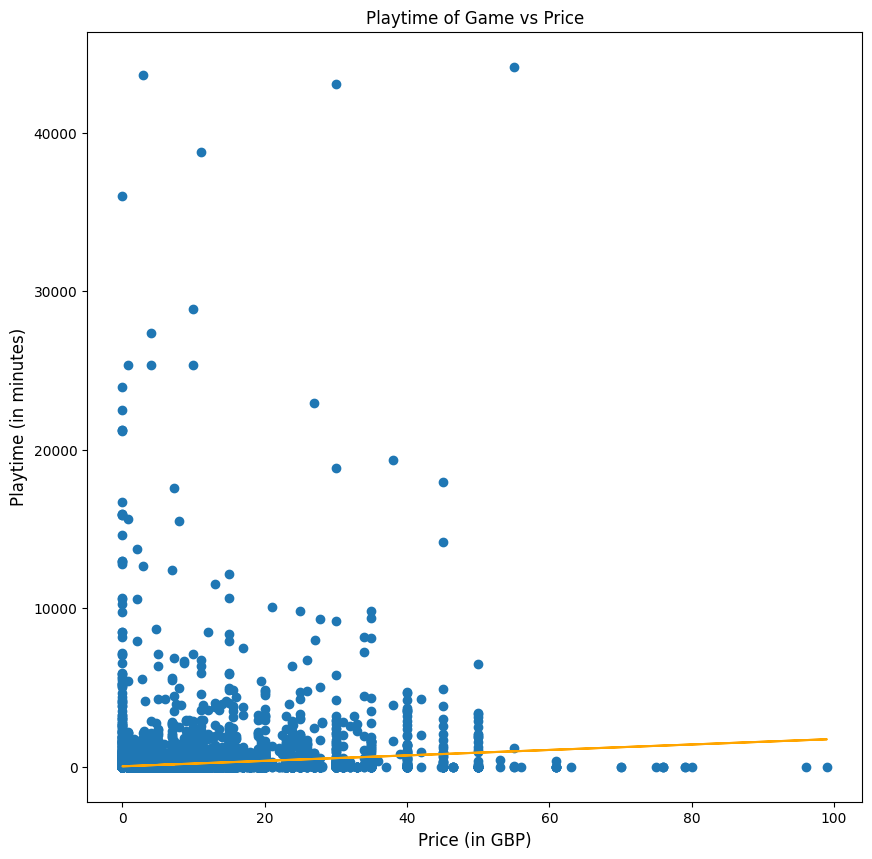

Slope of line:
[17.21861957]
R Squared:  0.013777200440742932
Spearman Rank Correlation: 0.08010711260585777
p-value: 9.048357111488325e-40


In [122]:
# There are a few games with an average playtime of over 50,000 minutes. These are extreme outliers
# and may even be errors.
filtered_df = games_df.drop(games_df[games_df["average_playtime"] > 50_000].index)
# Drop those with a price > 100 as there are only a few games with that price and it makes our graph unreadable
filtered_df = filtered_df.drop(filtered_df[filtered_df["price"] > 100].index)
# Set up graph
plt.figure(figsize=(10,10))
plt.xlabel("Price (in GBP)", fontsize=12)
plt.ylabel("Playtime (in minutes)", fontsize=12)
plt.title("Playtime of Game vs Price", fontsize=12)
# Scatter plot of playtime vs price
plt.scatter(filtered_df['price'], filtered_df['average_playtime'])
# Now we fit a linear regression line to the graph
linreg = LinearRegression()
# The training values we use are the entire set of prices and playtimes
x_train = np.array(filtered_df["price"]).reshape(-1, 1)
y_train = np.array(filtered_df["average_playtime"])
lin_model = linreg.fit(x_train, y_train)
# Predict y (average_playtime) from x (price)
plt.plot(filtered_df["price"], lin_model.predict(x_train), color='orange')
plt.show()
print("Slope of line:")
print(linreg.coef_)
# Evaluate how accurate our linear model is
print("R Squared: ", lin_model.score(x_train, y_train))
# Evaluate a relationship between x and y
corr, p_value = spearmanr(x_train, y_train)
print("Spearman Rank Correlation:", corr)
print("p-value:", p_value)

There does not appear to be any significant results from this graph. There are no obvious trends from just<br>
observing the graph and there are no trends based on the R-Squared value or the Spearman Rank Correlation.<br>
Both values are close to 0 meaning there is no (or very small) relation between price and playtime.<br>
##### **Ratings**
Now let's see how price relates to the ratings of the games.

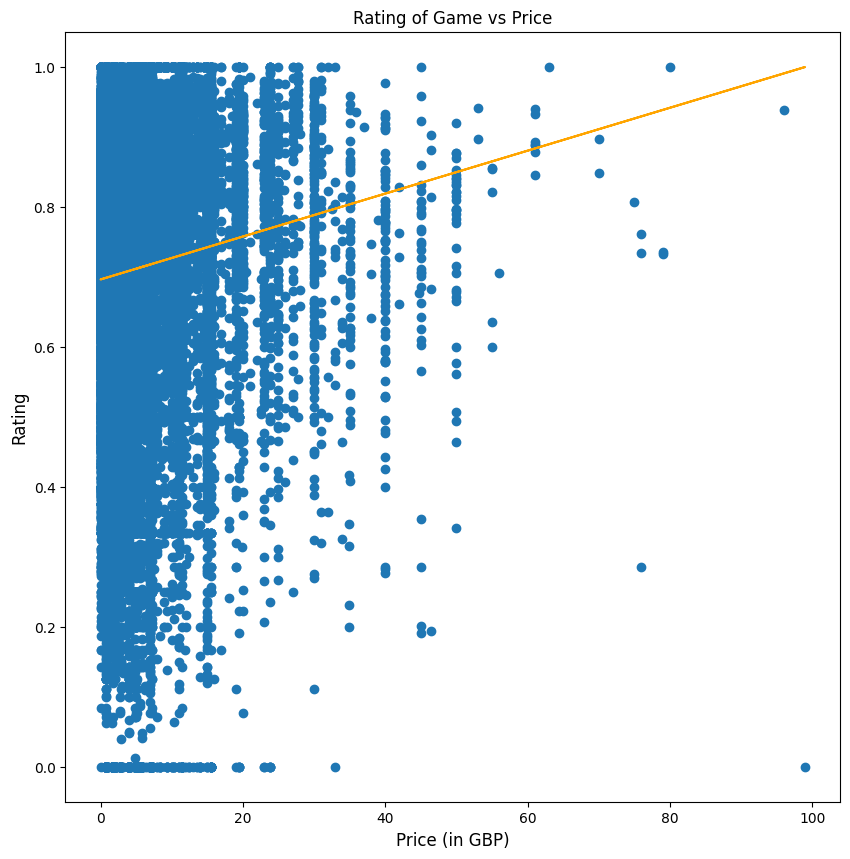

Slope of line:
[0.00306605]
R Squared:  0.007689622315858458
Spearman Rank Correlation: 0.12216057444578153
p-value: 1.8246289754049238e-90


In [123]:
# Drop those with a price > 100 as there are only a few games with that price and it makes our graph unreadable
filtered_df = filtered_df.drop(filtered_df[filtered_df["price"] > 100].index)
# Set up graph
plt.figure(figsize=(10,10))
plt.xlabel("Price (in GBP)", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.title("Rating of Game vs Price", fontsize=12)
# Scatter plot of rating vs price
plt.scatter(filtered_df['price'], filtered_df['rating'])
# Now we fit a linear regression line to the graph
linreg = LinearRegression()
# The training values we use are the entire set of prices and ratings
x_train = np.array(filtered_df["price"]).reshape(-1, 1)
y_train = np.array(filtered_df["rating"])
lin_model = linreg.fit(x_train, y_train)
# Predict y (rating) from x (price)
plt.plot(filtered_df["price"], lin_model.predict(x_train), color='orange')
plt.show()
print("Slope of line:")
print(linreg.coef_)
# Evaluate how accurate our linear model is
print("R Squared: ", lin_model.score(x_train, y_train))
# Evaluate a relationship between x and y
corr, p_value = spearmanr(x_train, y_train)
print("Spearman Rank Correlation:", corr)
print("p-value:", p_value)

Again there doesn't appear to be any significant results from this graph. No obvious trends from observation<br>
and this is confirmed by the close-to-zero values for R-Squared and Spearman Rank. However, there may be a slight<br>
positive correlation between price and rating since the Spearman Rank Correlation is 0.12.<br>
<br>
To summarize, a higher priced game seems to be strongly correlated with a higher revenue, but only slightly correlated<br>
with a higher playtime and rating.<br>

#### **3.4 Game Hardware Requirements and Success**
For the last metric, we will explore how the hardware requirments of a game relate to it's<br>
success. Do more hardware-intensive games have more success? This would suggest that better graphics<br>
of a game increase the chance of success. Or instead do less hardware-intensive games have more success<br>
since more people can play them?<br>
<br>
Since there are a lot of hardware requirements for games and not all of them can be easily compared<br>
(e.g., 2 different graphics cards are hard to compare), we will just focus on the RAM requirement for<br>
the game. This is just a number so it can be easily compared. A higher RAM requirement means a more<br>
graphically/computationally expensive game so it will be a good measure to use.<br>
##### How we will evaluate the graphs:
We will evaluate our graphs in the same way we did in Section 3.3.
##### **Revenue**

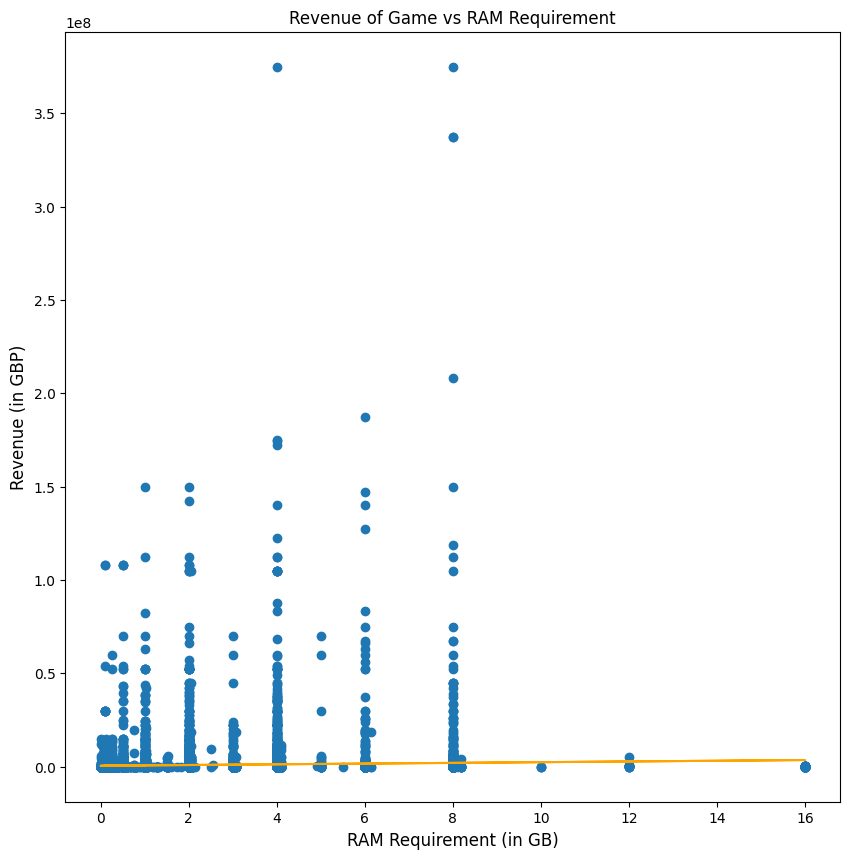

Slope of line:
[190191.19552378]
R Squared:  0.00289594821321415
Spearman Rank Correlation: 0.06251399865790182
p-value: 9.087453487640155e-23


In [124]:
# Drop the major outlier
filtered_df = games_df.drop(games_df[games_df["est_revenue"] > 0.5*10**9].index)
# Drop those with > 16 GB ram required (only a few and some of the extreme outliers make the graph unreadable)
filtered_df = filtered_df.drop(filtered_df[filtered_df["min_req_ram"] > 16].index)
# Drop those with NaN in min_req_ram (about 2.5k entries)
filtered_df = filtered_df.dropna(subset = ['min_req_ram'])
# Set up graph
plt.figure(figsize=(10,10))
plt.xlabel("RAM Requirement (in GB)", fontsize=12)
plt.ylabel("Revenue (in GBP)", fontsize=12)
plt.title("Revenue of Game vs RAM Requirement", fontsize=12)
# Scatter plot of revenue vs RAM
plt.scatter(filtered_df['min_req_ram'], filtered_df['est_revenue'])
# Now we fit a linear regression line to the graph
linreg = LinearRegression()
# The training values we use are the entire set of RAM and revenue
x_train = np.array(filtered_df["min_req_ram"]).reshape(-1, 1)
y_train = np.array(filtered_df["est_revenue"])
lin_model = linreg.fit(x_train, y_train)
# Predict y (est_revenue) from x (min_req_ram)
plt.plot(filtered_df["min_req_ram"], lin_model.predict(x_train), color='orange')
plt.show()
print("Slope of line:")
print(linreg.coef_)
# Evaluate how accurate our linear model is
print("R Squared: ", lin_model.score(x_train, y_train))
# Evaluate a relationship between x and y
corr, p_value = spearmanr(x_train, y_train)
print("Spearman Rank Correlation:", corr)
print("p-value:", p_value)

There are no obvious trends in this graph and this is confirmed by the very close to zero results<br>
of R-Squared and Spearman Rank. This suggests that RAM has little to no impact on the revenue of the<br>
game. This may be used to suggest that higher hardware requirements do not have much impact on the revenue<br>
of the game. This is a bit surprising. 
##### **Playtime**

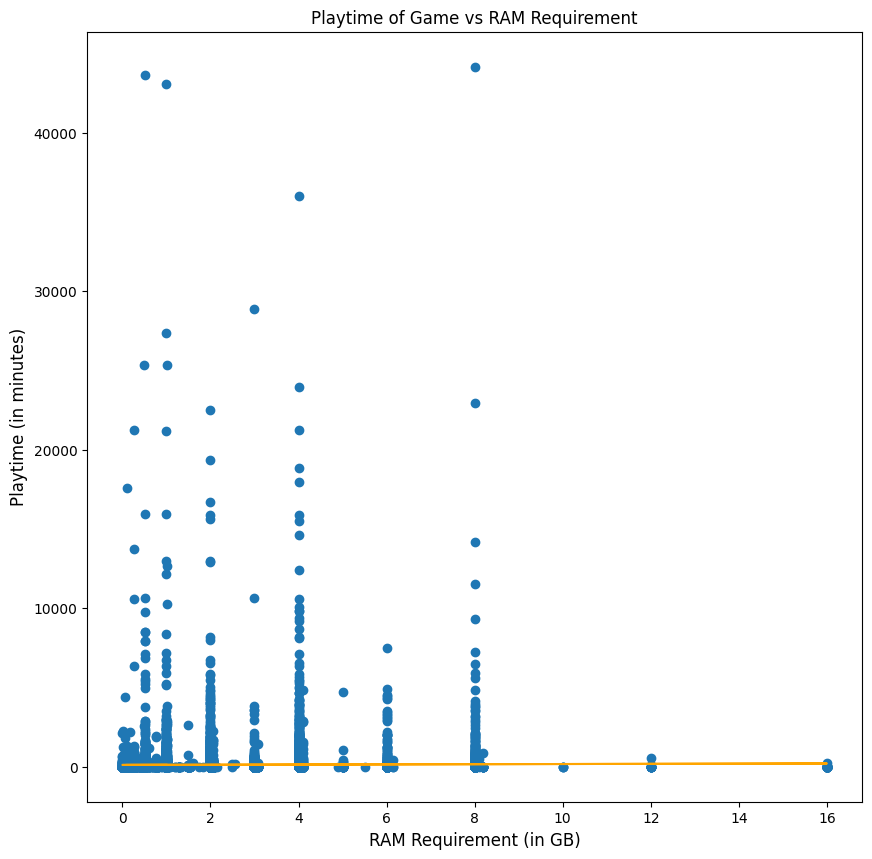

Slope of line:
[5.64626105]
R Squared:  0.00017148913340880867
Spearman Rank Correlation: -0.04926200841772169
p-value: 1.0265072179264815e-14


In [125]:
# Drop those with > 16 GB ram required (only a few and some of the extreme outliers make the graph unreadable)
filtered_df = games_df.drop(games_df[games_df["min_req_ram"] > 16].index)
# There are a few games with an average playtime of over 50,000 minutes. These are extreme outliers
# and may even be errors.
filtered_df = filtered_df.drop(filtered_df[filtered_df["average_playtime"] > 50_000].index)
# Drop those with NaN in min_req_ram (about 2.5k entries)
filtered_df = filtered_df.dropna(subset = ['min_req_ram'])
# Set up graph
plt.figure(figsize=(10,10))
plt.xlabel("RAM Requirement (in GB)", fontsize=12)
plt.ylabel("Playtime (in minutes)", fontsize=12)
plt.title("Playtime of Game vs RAM Requirement", fontsize=12)
# Scatter plot of playtime vs RAM
plt.scatter(filtered_df['min_req_ram'], filtered_df['average_playtime'])
# Now we fit a linear regression line to the graph
linreg = LinearRegression()
# The training values we use are the entire set of RAM and playtimes
x_train = np.array(filtered_df["min_req_ram"]).reshape(-1, 1)
y_train = np.array(filtered_df["average_playtime"])
lin_model = linreg.fit(x_train, y_train)
# Predict y (average_playtime) from x (min_req_ram)
plt.plot(filtered_df["min_req_ram"], lin_model.predict(x_train), color='orange')
plt.show()
print("Slope of line:")
print(linreg.coef_)
# Evaluate how accurate our linear model is
print("R Squared: ", lin_model.score(x_train, y_train))
# Evaluate a relationship between x and y
corr, p_value = spearmanr(x_train, y_train)
print("Spearman Rank Correlation:", corr)
print("p-value:", p_value)

Again, there are no obvious trends and the R-Squared value and the Spearman Rank Correlation are very close to 0<br>
suggesting that there is no relationship between RAM requirement and playtime.<br>
##### **Ratings**

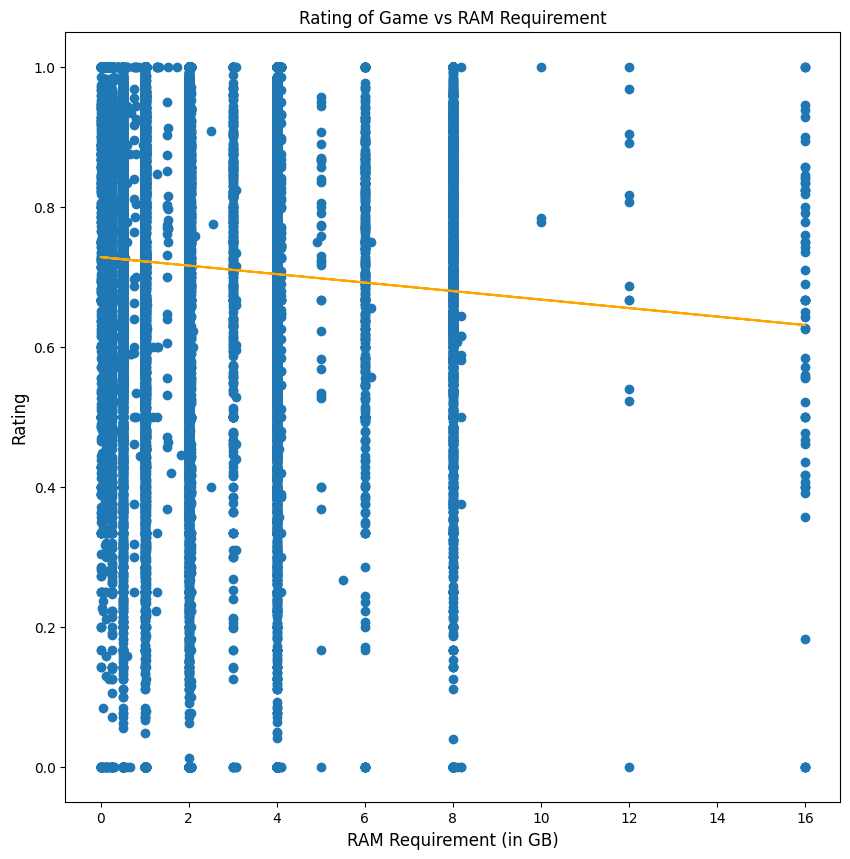

Slope of line:
[-0.00606724]
R Squared:  0.0033711174148746137
Spearman Rank Correlation: -0.05310791389951006
p-value: 7.322090104562239e-17


In [126]:
# Drop those with > 16 GB ram required (only a few and some of the extreme outliers make the graph unreadable)
filtered_df = games_df.drop(games_df[games_df["min_req_ram"] > 16].index)
# Drop those with NaN in min_req_ram (about 2.5k entries)
filtered_df = filtered_df.dropna(subset = ['min_req_ram'])
# Set up graph
plt.figure(figsize=(10,10))
plt.xlabel("RAM Requirement (in GB)", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.title("Rating of Game vs RAM Requirement", fontsize=12)
# Scatter plot of rating vs RAM
plt.scatter(filtered_df['min_req_ram'], filtered_df['rating'])
# Now we fit a linear regression line to the graph
linreg = LinearRegression()
# The training values we use are the entire set of RAM and ratings
x_train = np.array(filtered_df["min_req_ram"]).reshape(-1, 1)
y_train = np.array(filtered_df["rating"])
lin_model = linreg.fit(x_train, y_train)
# Predict y (rating) from x (min_req_ram)
plt.plot(filtered_df["min_req_ram"], lin_model.predict(x_train), color='orange')
plt.show()
print("Slope of line:")
print(linreg.coef_)
# Evaluate how accurate our linear model is
print("R Squared: ", lin_model.score(x_train, y_train))
# Evaluate a relationship between x and y
corr, p_value = spearmanr(x_train, y_train)
print("Spearman Rank Correlation:", corr)
print("p-value:", p_value)

Again, there are no obvious trends and the R-Squared value and the Spearman Rank Correlation are very close to 0<br>
suggesting that there is no relationship between RAM requirement and rating.<br>
<br>
To summarize, the RAM requirement for a game does not seem to have any impact on its success. No significant findings<br>
were found for RAM in how it relates to revenue, playtime, or rating. This may be extrapolated to suggest that hardware<br>
requirements do not impact the success of a game. However, further analysis would have to be done to confirm this by<br>
looking at other hardware requirements such as graphics card and processor. Perhaps the naive approach to just look at RAM<br>
was not sufficient.<br>
<br>
If these results are representative of hardware requirements in general, the results are pretty suprising. One might think<br>
that higher hardware requirements means a more visually appealing game, and thus more successful, however, this does not<br>
appear to be the case.<br>